# Attention is All You Need


## Prerequisites:

To learn Self Attention and Transformer, you must be aware of a few basic concepts like:

- Word embeddings
- Encoder Decoder Architecture
- Attention Mechanism in a Sequence to Sequence model


## Learning Objectives
- Get familiar with Self Attention and Transformer


**Transformer**

The transformer has revolutionized the way we do sequential data processing. Google, in 2017 proposed a paper, **attention is all you need** that introduced the concept of the transformer. They named their paper so because the concept of the transformer depends only on the attention mechanism. The transformer gets rid of the sequential model like RNNs and LSTMs. The attention mechanism, though, has improved the performance of these sequential model, there has always been the bottleneck problem with a sequential model like LSTMs and RNNs as these model process data sequentially (a time step has to depend on the output of previous time step).

Recurrent neural network like LSTM has been established as a state of art approaches for sequence modeling, language modeling, and machine translation. In these model, the hidden state($h_t$) is computed from the previous hidden state($h_{t-1}$) and input at time state t. Because of this sequential nature, we cannot apply parallelization. Parallelization here refering to to the processing of different sequence timesteps independently. Moreover, it is difficult to learn long-term dependency on the sequences.

To address this problem, the author proposed a new simple network architecture, the Transformer, which is solely based on the attention mechanism avoiding the need for recurrence.

Since the proposed model gets rid of recurrence, parallelization can be applied, hence significantly reducing the time required for training. 

The Transformer uses the attention mechanism to boost the speed with which the model can be trained. 
Tranformer uses the same base model i.e, encoder-decoder representation as used by sequence to sequence model.

The figure below shows the high-level view of the transformer. It is to be noted that the neural network in encoder and decoder is not recurrent neural network. The encoder maps an input sequence representations ($x_1, \space x_2, ....x_n$) to a another representation ($v_1, \space v_2, ... v_n$) which is transmitted to the decoder side which is used to generate an output sequence ($y_1, \space y_2, ... y_m$) of symbols; such that one symbol is generated at a time. At each preceding step, the model consume previously generated symbols when generating the next symbol.

<figure>
<center>


<p>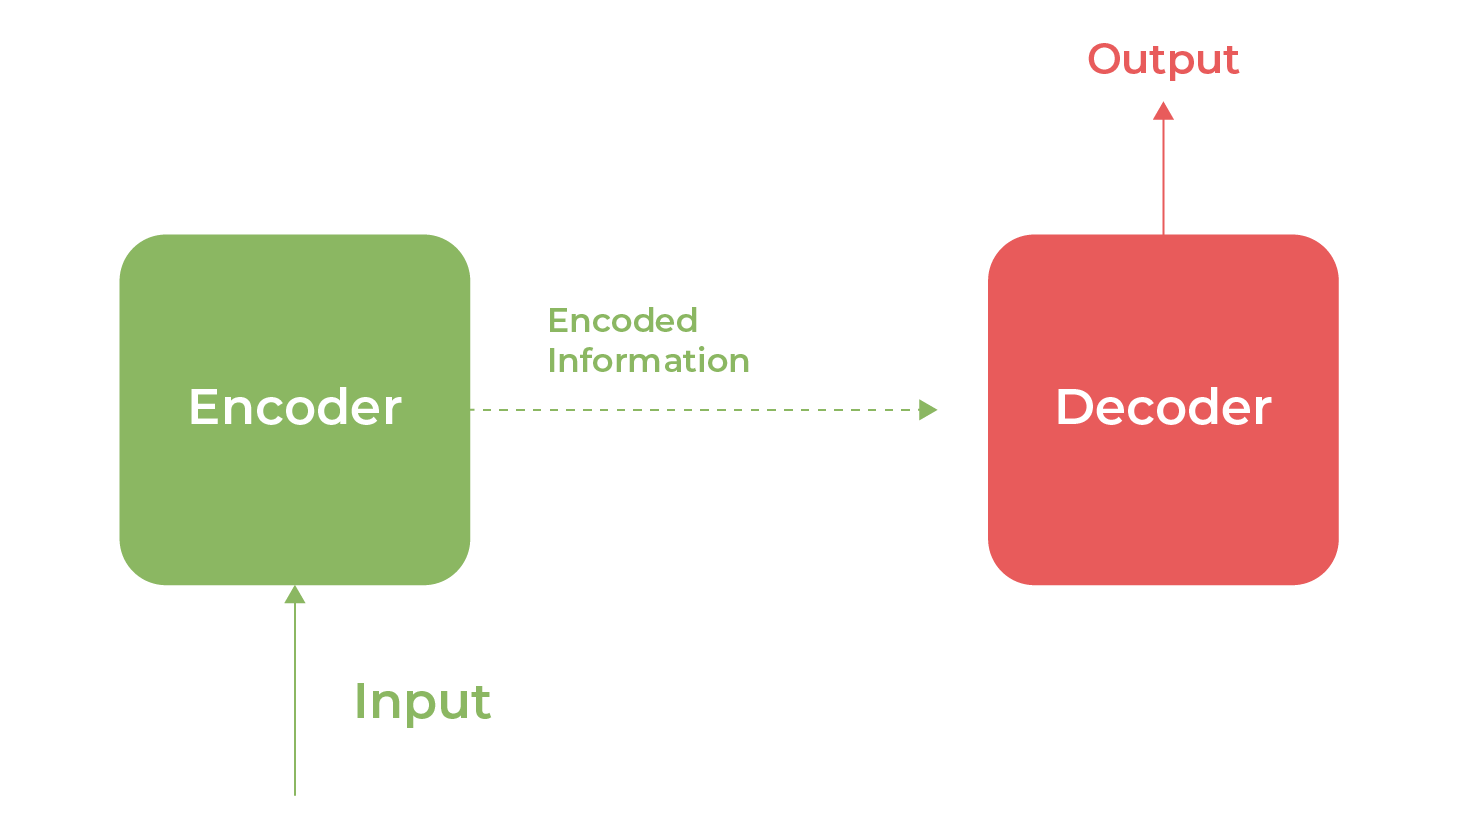</p>
<figcaption> Figure 1: General encoder-decoder architecture. </figcaption>
</center>
</figure>


The figure below shows the different components used inside the encoder and decoder block.

<figure>
<center>
<img src="https://dair.ai/images/summary-attention-is-all-you-need/architecture.png" alt="transformer" width="400">
<figcaption>Figure 2: Architecture of transformer. </figcaption>
<b>Source:</b> Paper(Attention is all you need)
</center>
</figure>






















Before diving deep into the Transformer, let's discuss three key points of the transformer:
* **Not sequential like RNNs**:

 Unlike in RNNs, all the input (e.g, sentence) is fed into the model at once and all relevant calculation is performed at once. 


* **Self-attention**:
  Self-attention is a method to improve the input encoding of data. Each input word attends all other words to obtain it's an improved version of encoding. The figure below shows how each word in the input sentence may attend or focus on other words for a better clue on word representation.

<figure>
<center>


<p>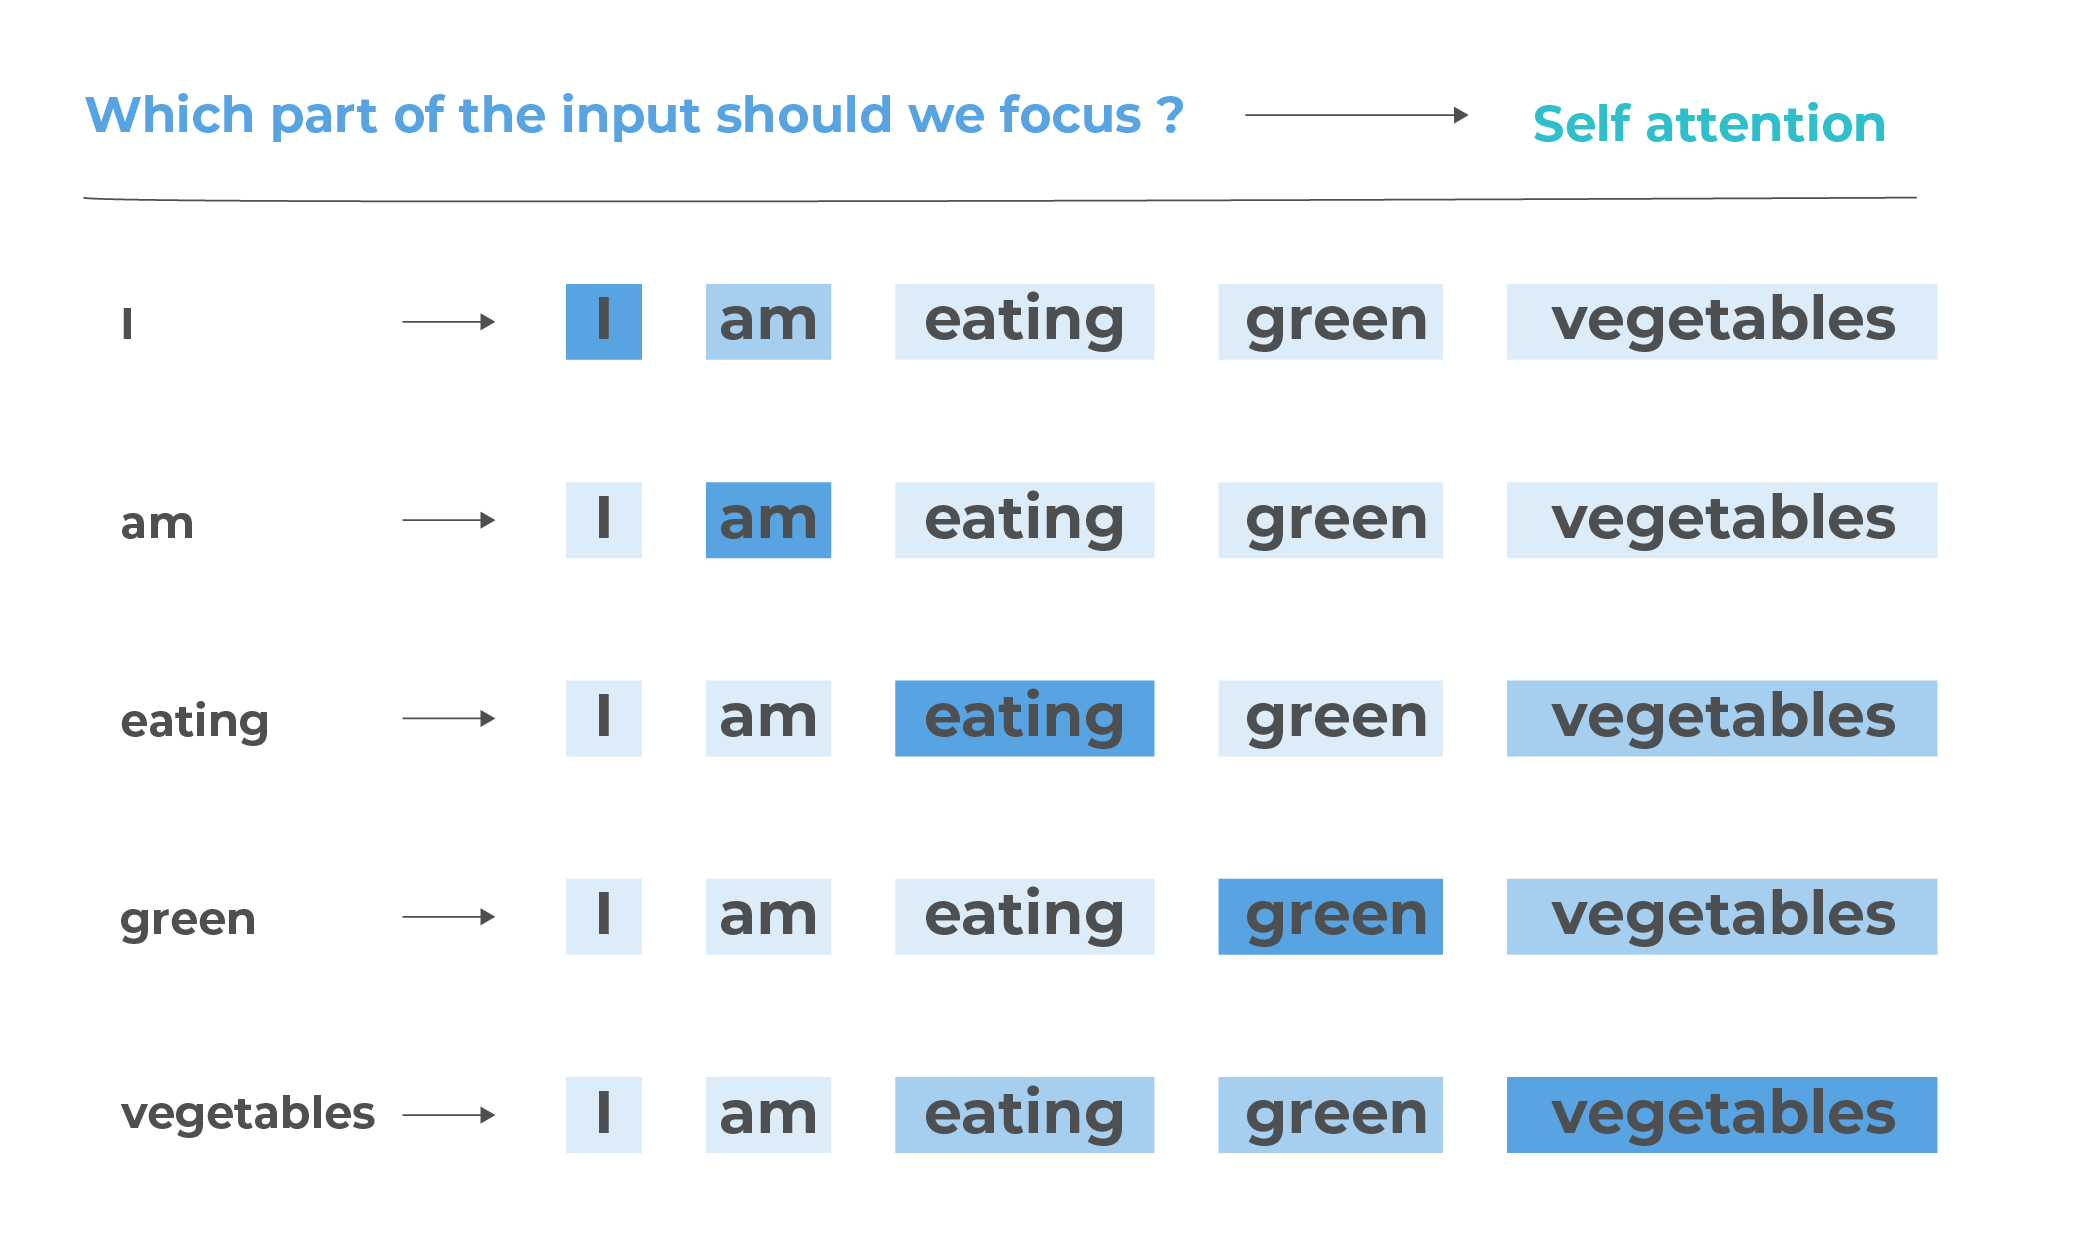</p>
 <figcaption> Figure 3: Image showing how each of the words in a sentence  depends on other words for their semantic meaning </figcation>
</center>
</figure>
 
   In self-attention, context matrix(attention matrix) is generated from the model's own input matrix representation, that means query(Q), key(K) and value(V) all are generated in encoder side (or decoder side) independently from other side using input word embedding.

<figure>
<center>


<p>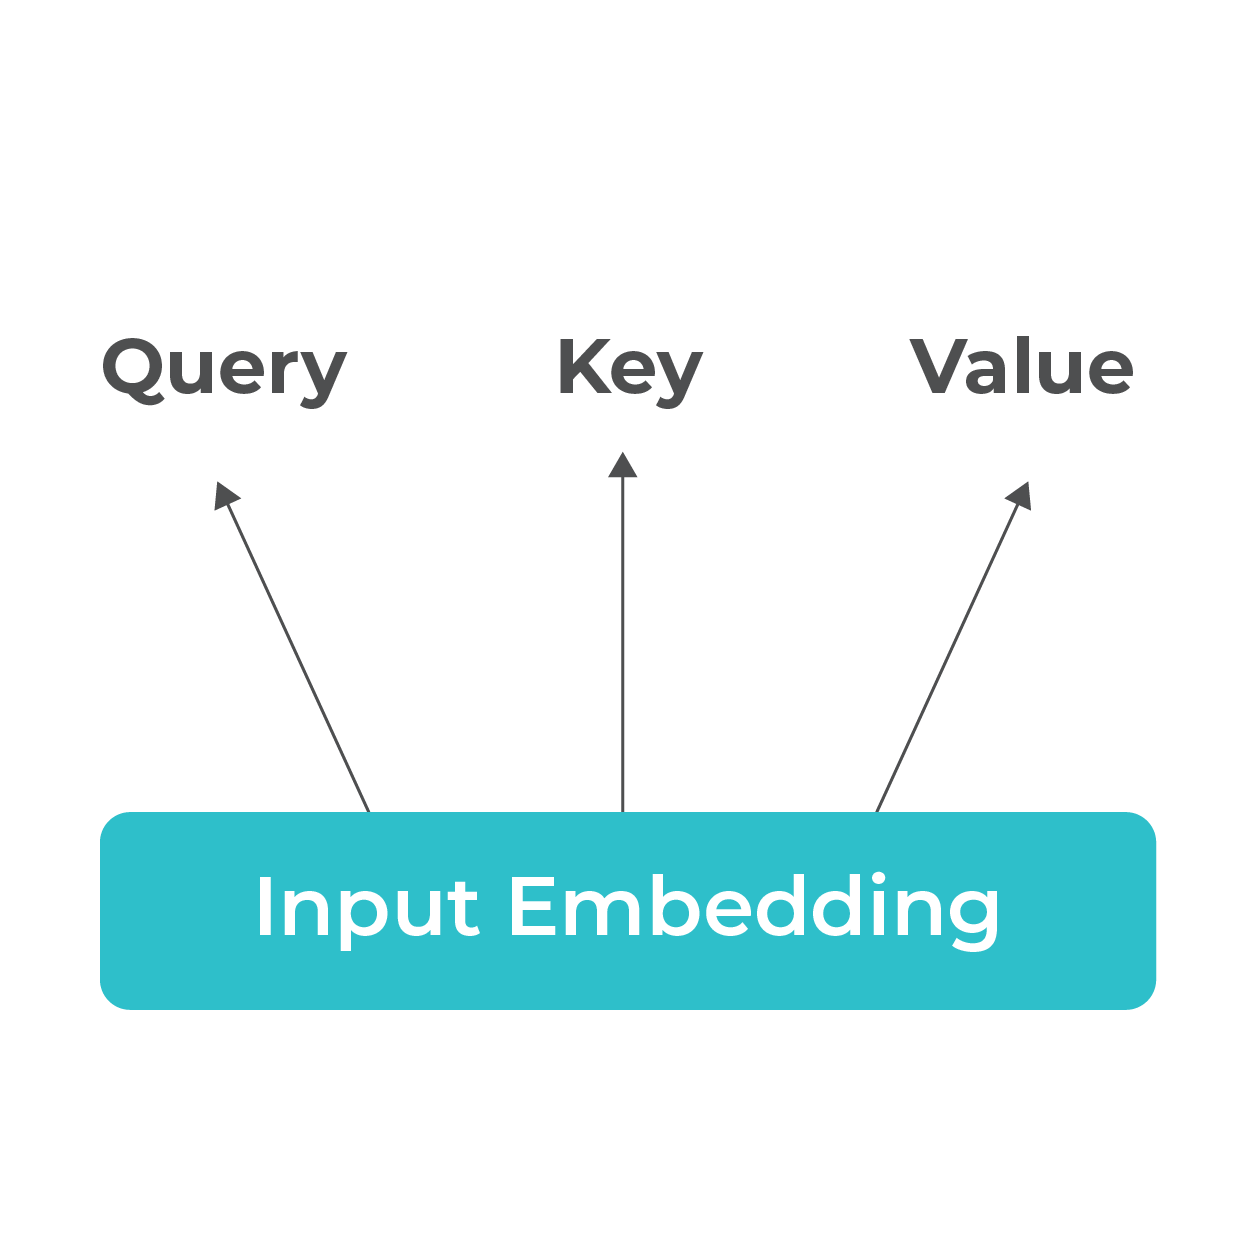</p>
<figcaption> Figure 4: Image showing from where query, key and value are computed </figcation>
</center>
<figure>


So as shown in Figure 4, we extract query, key, and value using the input embeddings. Like input embedding query, key and value are also matrix. The general strategy is that matrix size of the query, key and value are less than that of input embedding size. For computing these matrix(Q, K, and V), we are separately performing three transformations of the input embedding to obtain three new embeddings (or matrix) called query, key, and value.

The image below shows how to calculate the matrix- query, key value.

<figure>
<center>


<p>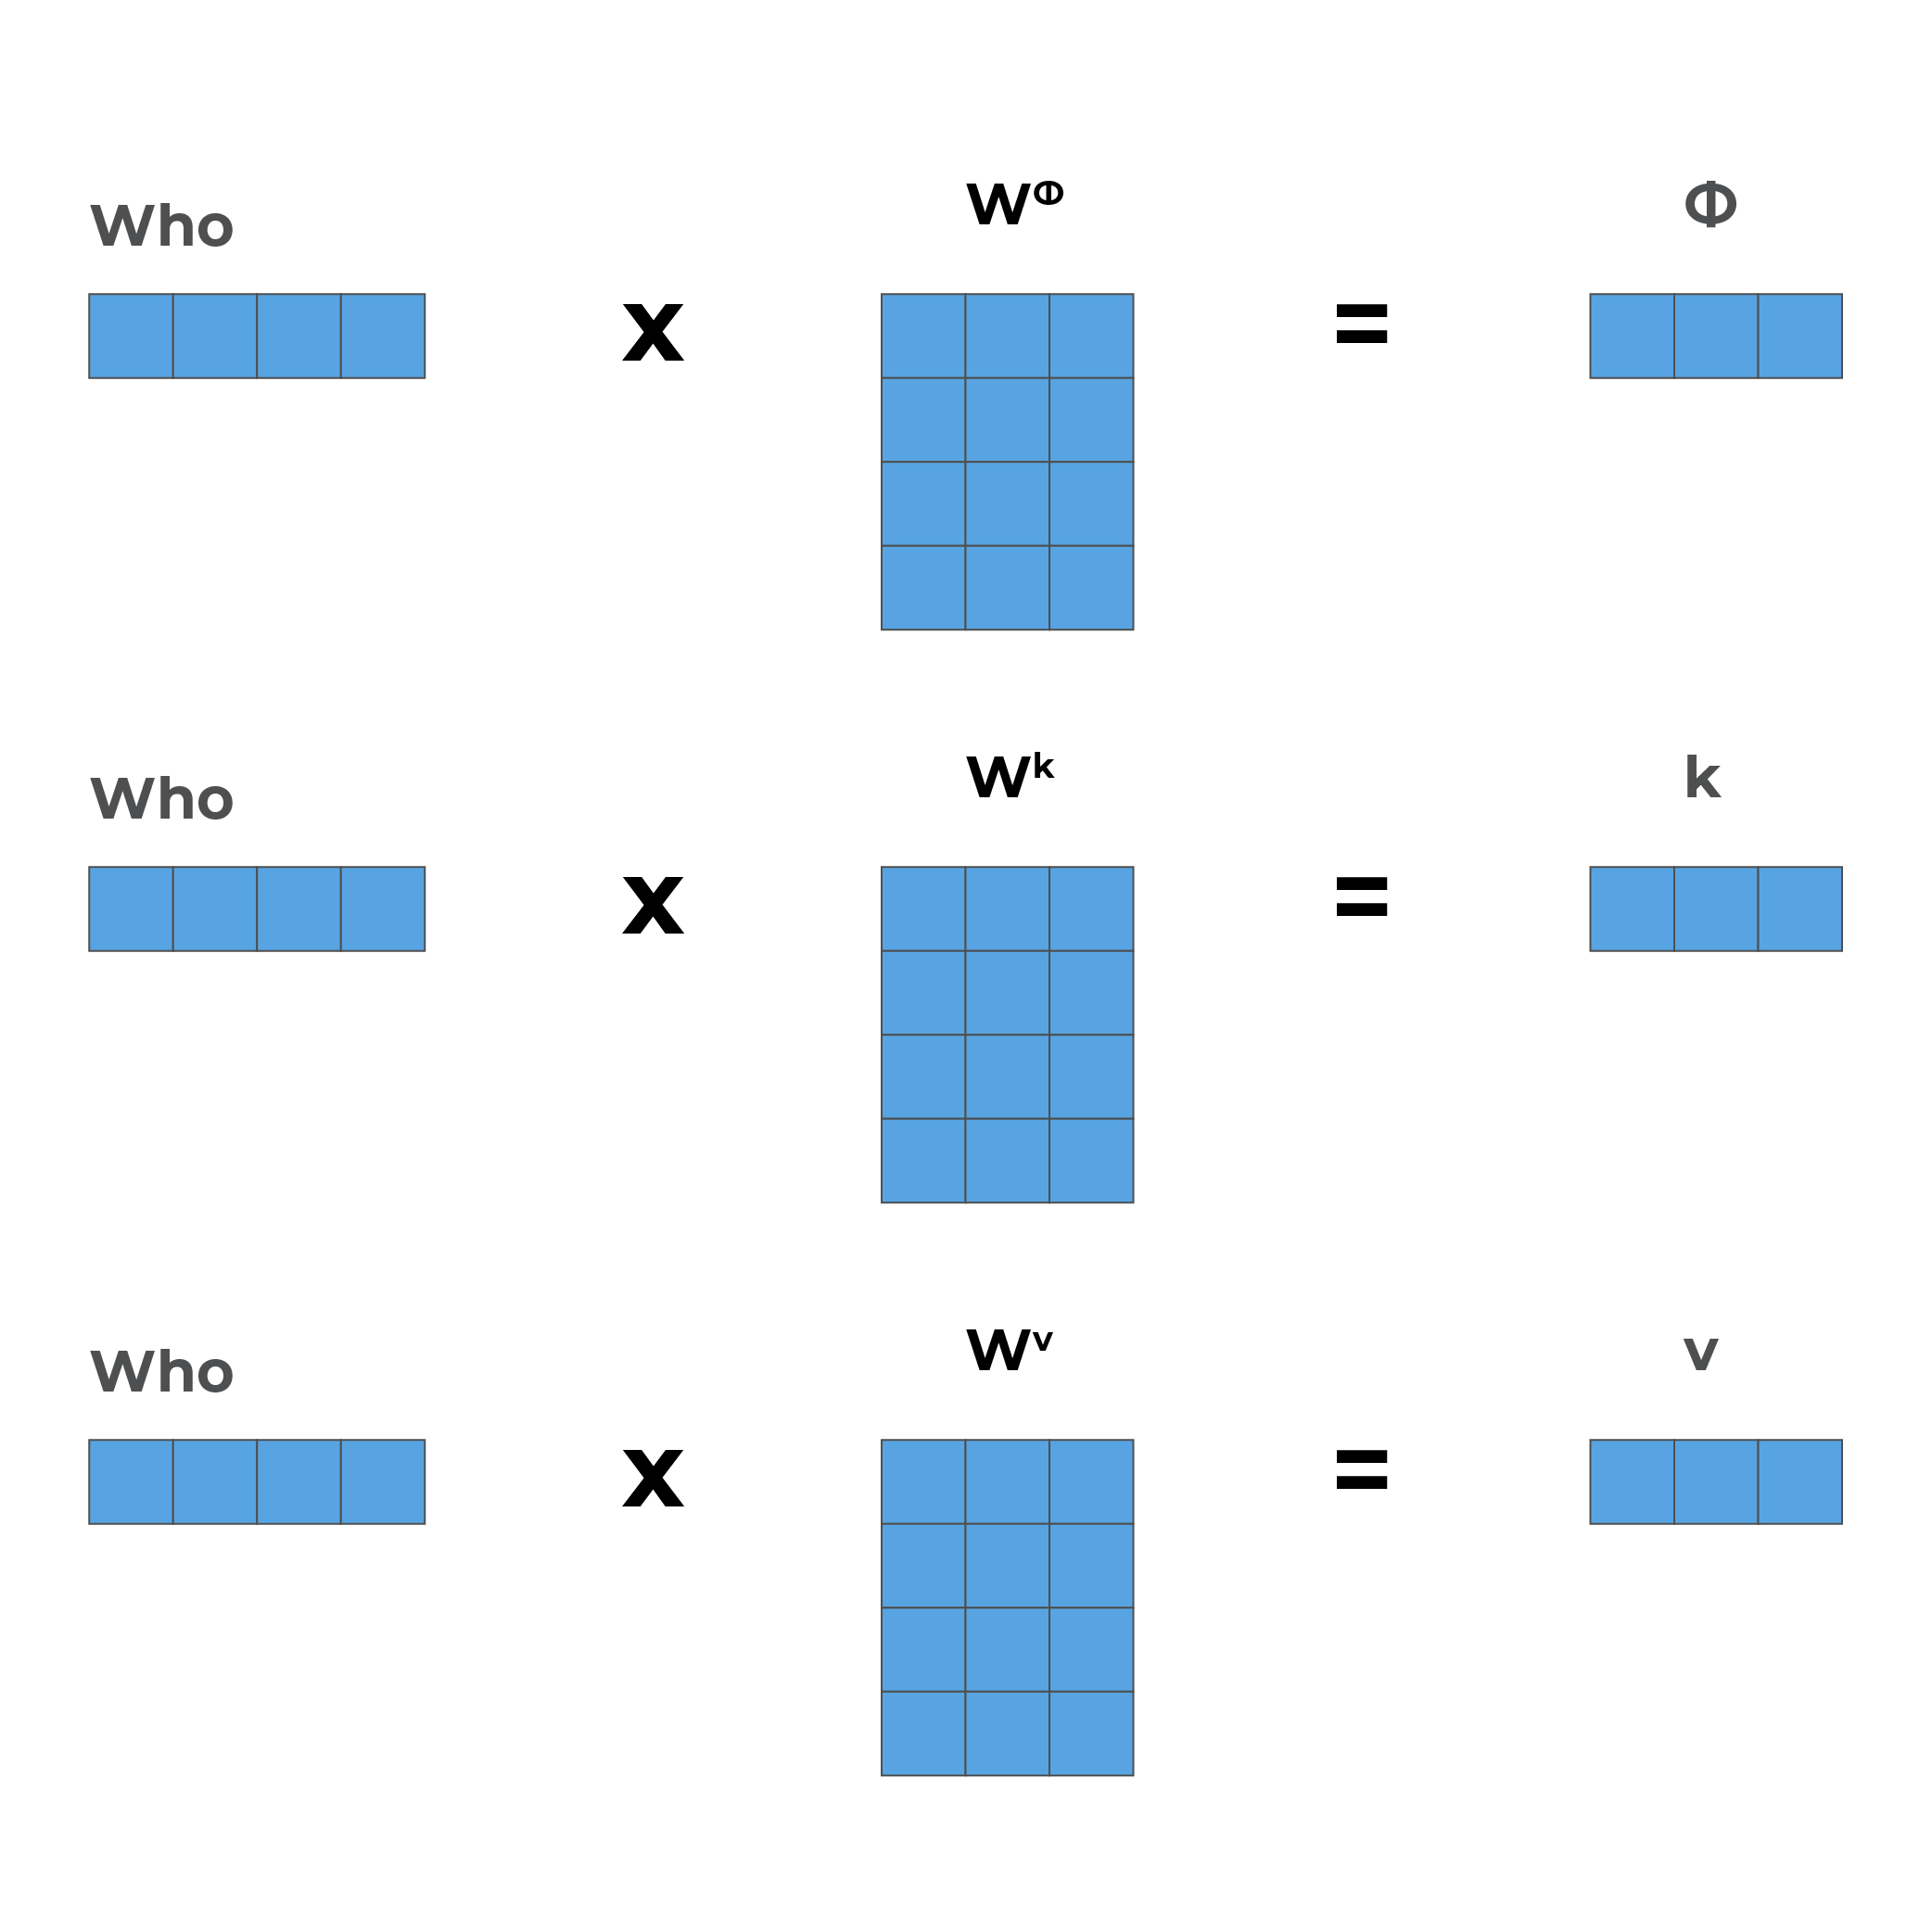</p>
 <figcaption> Figure 5: Calculation of Query, Key and Value from input word embedding </figcation>
</center>
</figure>


The Figure 5 shows how we are obtaining matrix (Q,K, and V) for the word "Who". What we are actually doing is that we are performing separate three linear transformations of the input embedding corresponding to the word "Who". The matrix ($W^Q$, $W^K$ and $W^V$) are the transformation matrix, also called learnable parameters. They actually represent a single layer dense network. The matrix corresponds to the learnable weight of the dense layer.

Once we compute the query, key and value, the equation for attention matrix is given as:
$$Attention(Q,K,V) = softmax(\frac{Q.K^T}{\sqrt{d_k}})V$$
Where, $d_k$ is embedding dimension used to penalize the large value generated by dot product between two  matrix.

There are different approaches for computing attention: Additive and multiplicative method. Attention using a scaled-dot product is one of the simplest multiplicative approaches which is both computation and memory efficient.

Let's see the animation in the video below to better understand what is happening in the self-attention mechanism.


In [ ]:
from IPython.display import HTML

HTML("""
    <video width="100%" height = " 500" alt="test" controls>
        <source src="https://docs.google.com/uc?export=download&id=1Ct4pDJ7cvSLb-SqT1VNIox8sCBglzUOr" type="video/mp4">
    </video>
""")



  **How is self-attention useful?**

  To understand how self-attention is useful, suppose we want to translate the following two sentences:
  1. The $\underline{animal}$ didn't cross the street because $\underline{it}$ was too tired.

  2. The animal didn't cross the $\underline{street}$ because $\underline{it}$ was too wide.

  In the first sentence, the word "it" actually refers to the word "animal" whereas it refers to the word "street" in the second sentence. It is easier for a human to specify what the word "it" refers to, however it is not an easy task for the algorithm.
With self-attention, we can visualize how each word in the sentence is attending while generating their embedding(encoding). So in self-attention, it considers each of the words in the sentence independently and looks other words in the sentence for a clue about dependency between each word. The figure below shows what the word "it" refers to.

 [Image Source](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)






<figure>
<center>


<p>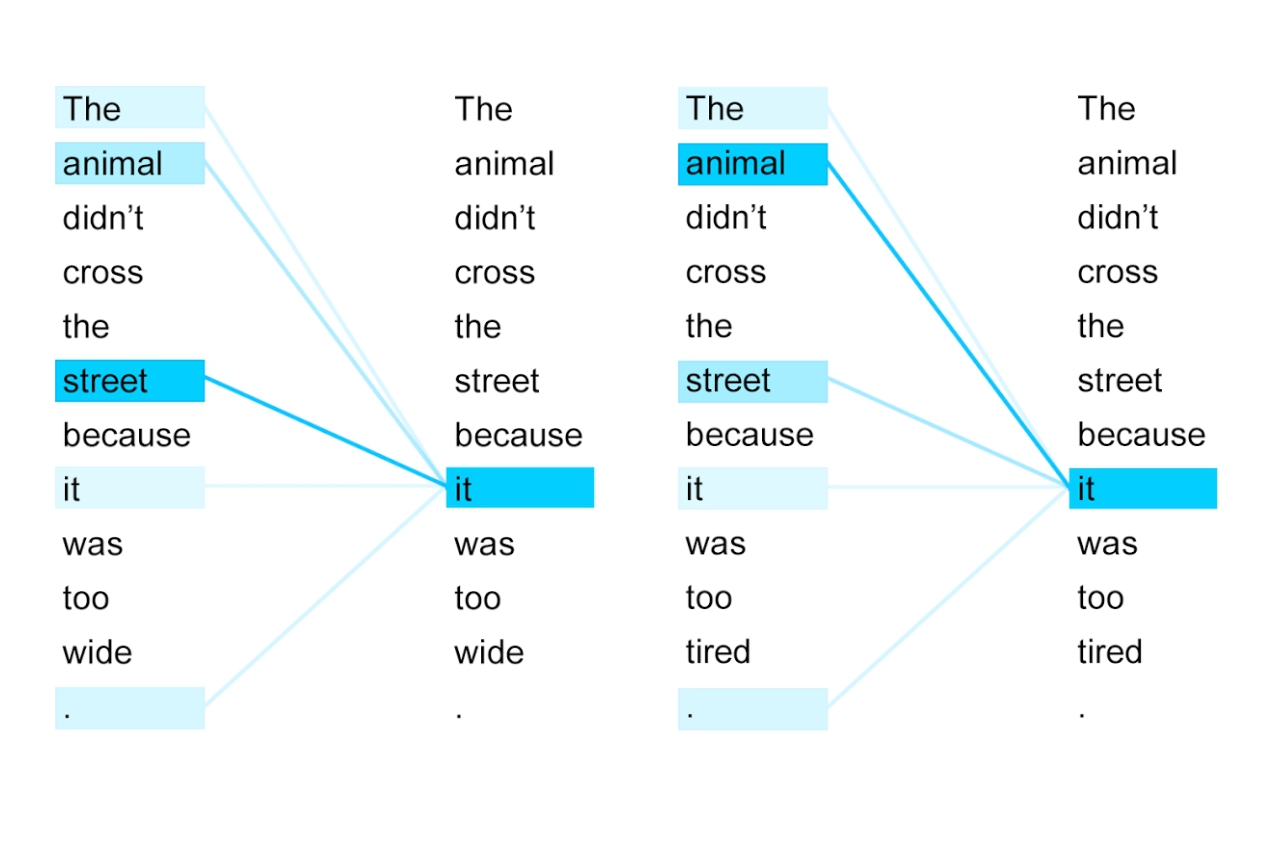</p>
 <figcaption> Figure 6: Visual representation of self attention in a sentence </figcation>
</center>
</figure>





**Multihead attention** 

 Multihead attention gives a model the capability of focusing on different words in an h different ways, where h is the number of heads. The above video shows single head attention in which we create one set of query, key, and value for each input. In multi-head attention, we generate multiple sets of query, key, and value for each input. Doing so we can have a different representation of input word considering from different perspectives and hence have different context matrix. 
 So, for 8 head attention, we will have 8 different queries, keys, and values for each input embedding. In matrix form it can be represented as:




<figure>
<center>


<p>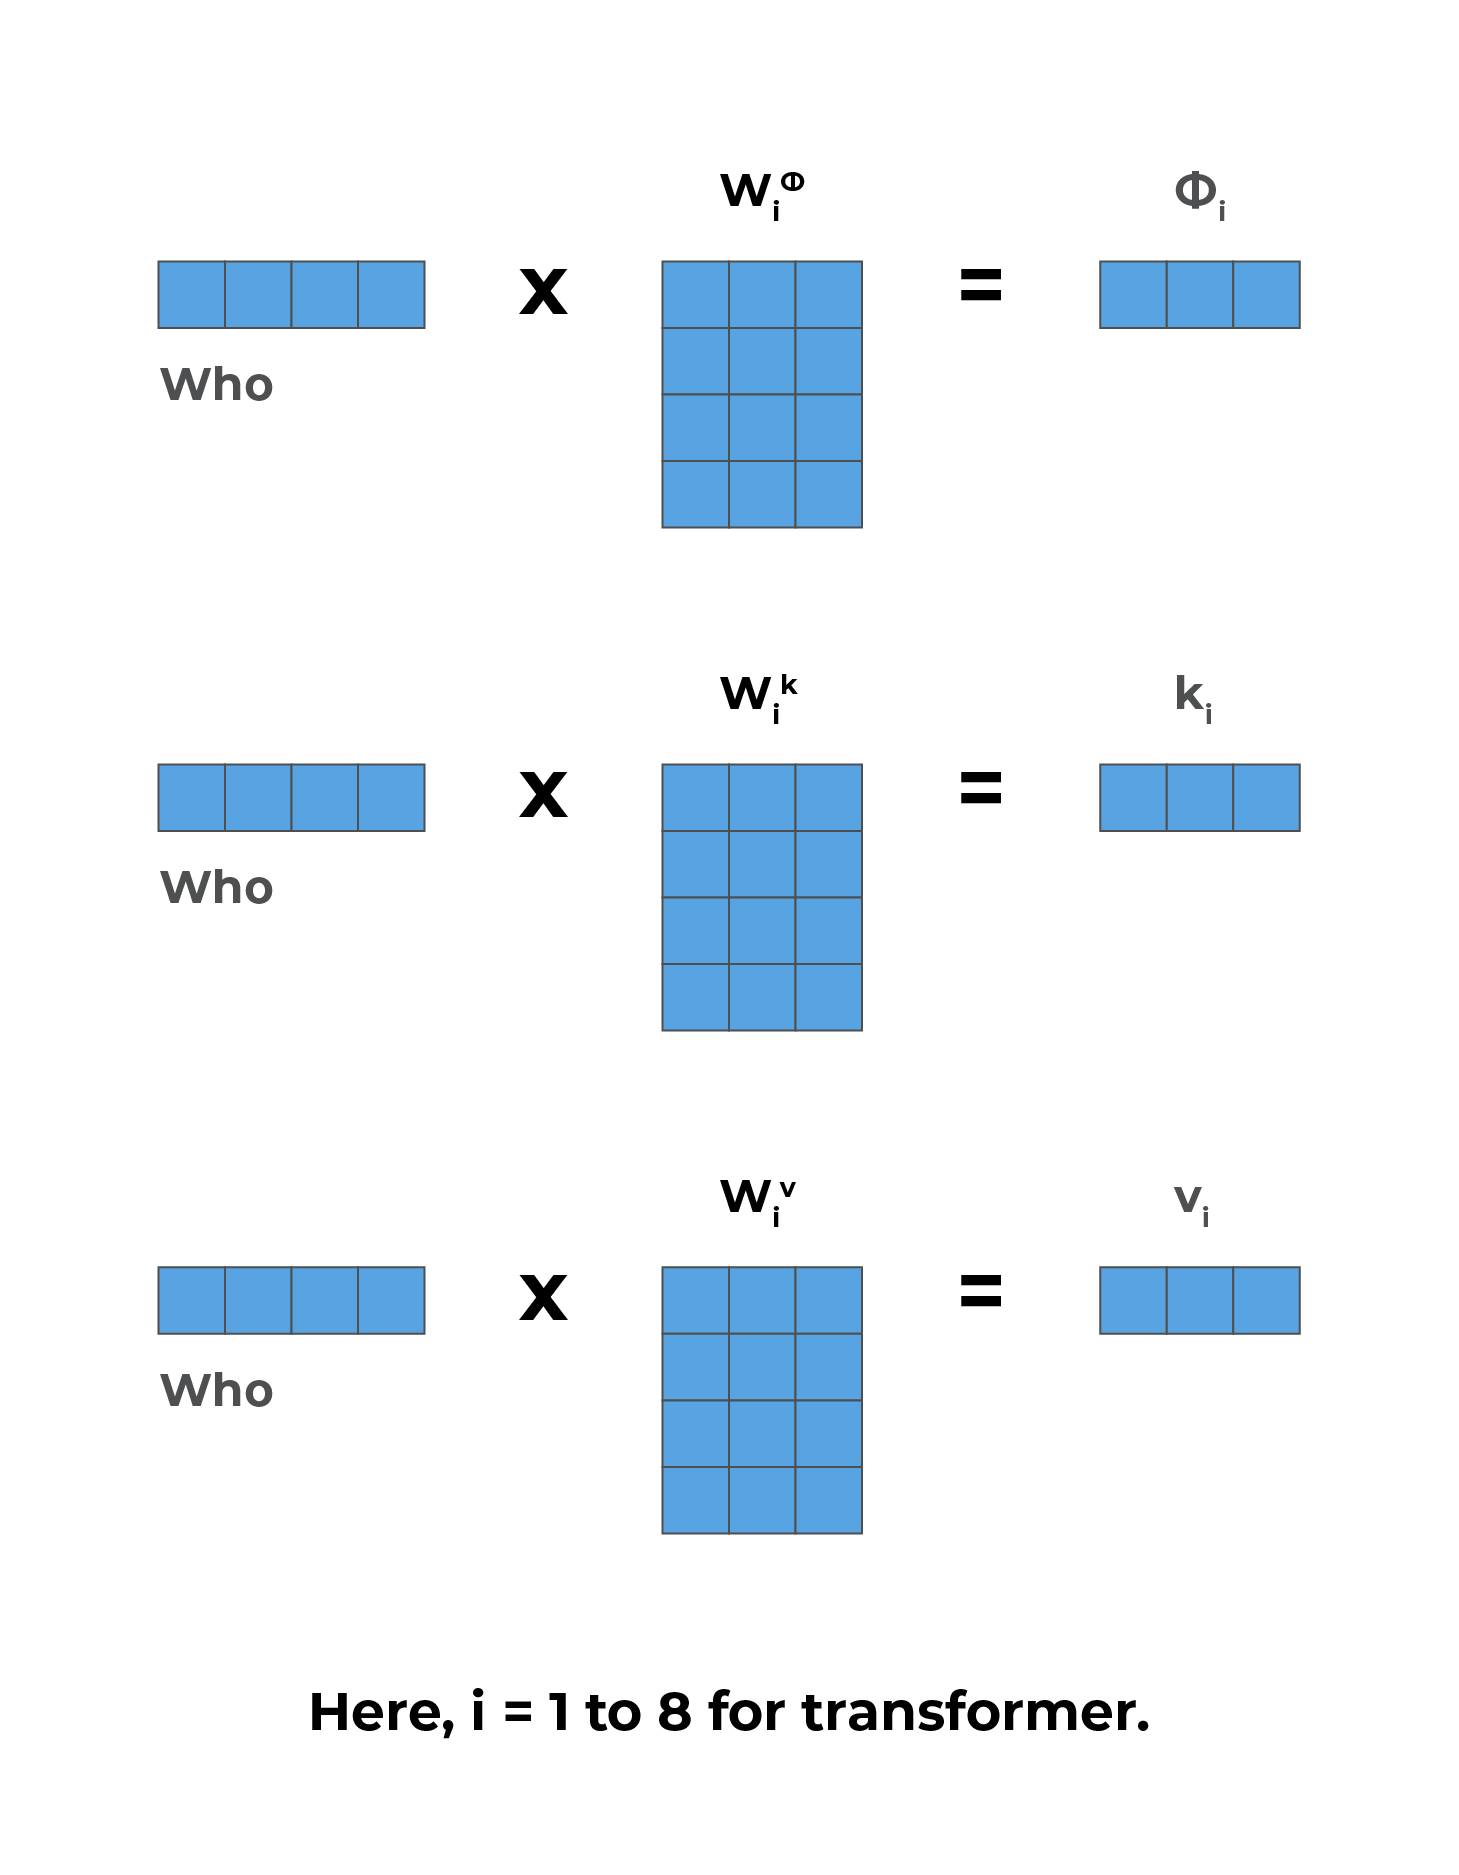</p>
 <figcaption> Figure 7: Calculation of query, key and value matrix sets in multi-head attention for an input embedding corresponding to the word "Who". These matrix sets are calculated via separate linear transformation.</figcation>
</center>
</figure>


**Components in transformer**

The transformer has encoder-decoder architecture. The encoder and decoder of transformer are very much similar, expect decoder masked multi-head component as an extra component. The input to the multi-head attention at the decoder comes from two sources; encoder output and output of the masked multi-head attention at decoder. We will discuss about this later. For now let's start discussing about different components in encoder of transformer.


i. *Input embedding:*

Generally, the sentence in the datasets is of variable length. To load the sentences in a batch through our model, we need to set the maximum length and pad those sentences that are shorter than the maximum length. So padding is based on maximum length sentence.

For the following sentences, we pad shorter sentences with 0.

<figure>
<center>


<p>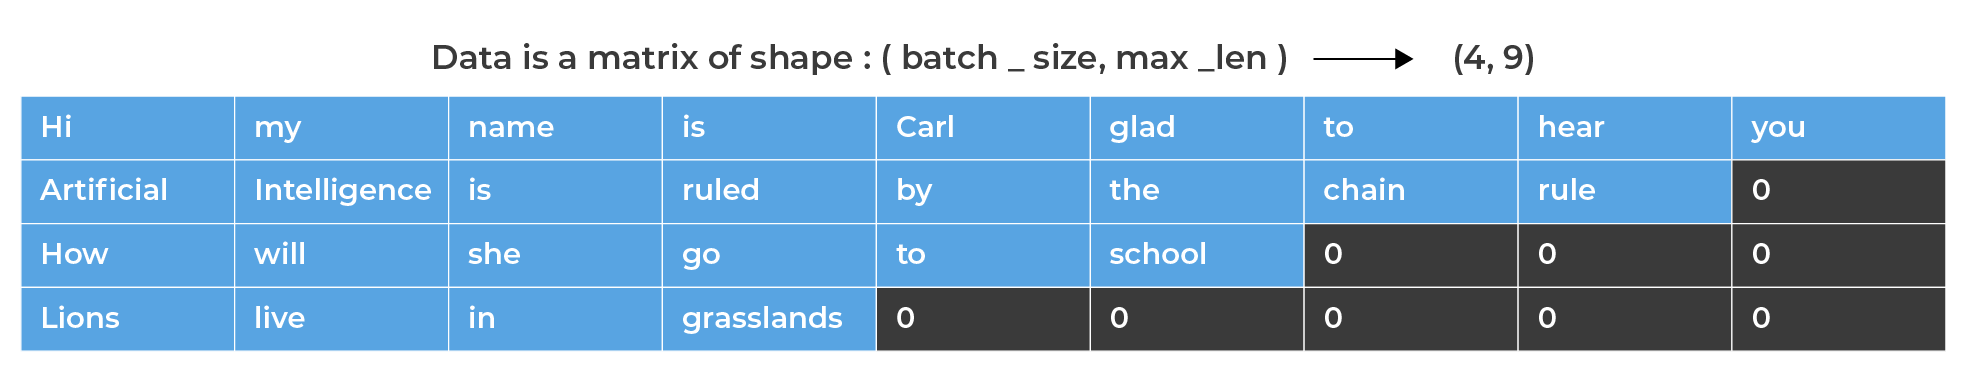</p>
<figcaption> Figure 8: Shorter sentences padded by zero. </figcation>
</center>
</figure>



Since some of the sentences are padded, we don't want the model to pay attention to the padded words, so we set the mask for each sentence.

For the above, we set masking by representing word with 1 and padded word with 0 as:

<figure>
<center>


<p>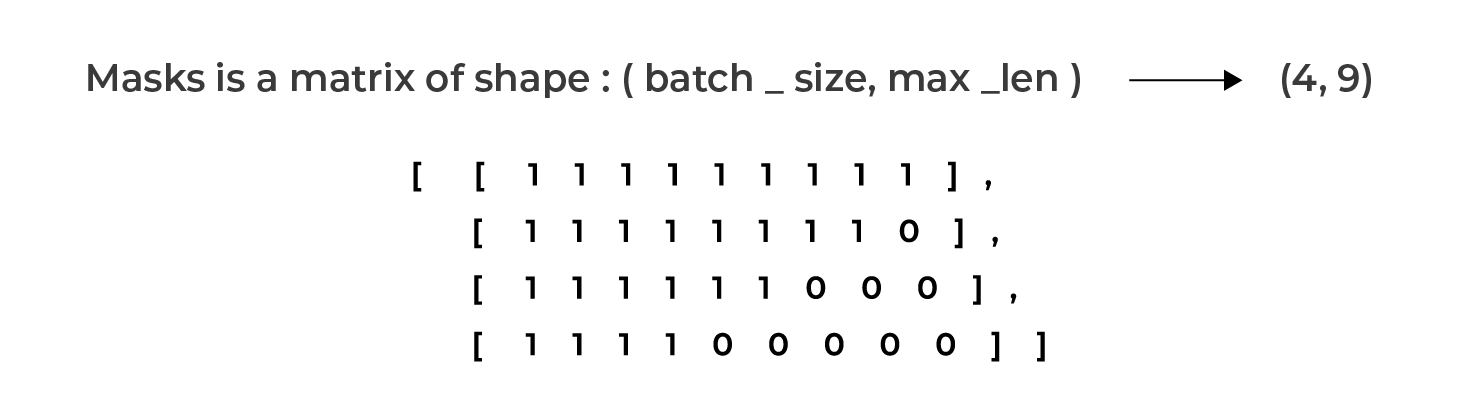</p>
<figcaption> Figure 9: Masking of input; each word occurance in a sentence represented by 1 and zero padding by 0. </figcation>
</center>
</figure>

Since we can't pass words directly to the encoder, we pass the embedding representation of each word. The transformer uses a 512-dimensional embedding vector. So the first layer is the embedding layer that embeds all the words in our sentence. With embedding data is represented in three-dimensional space as: 

<figure>
<center>


<p>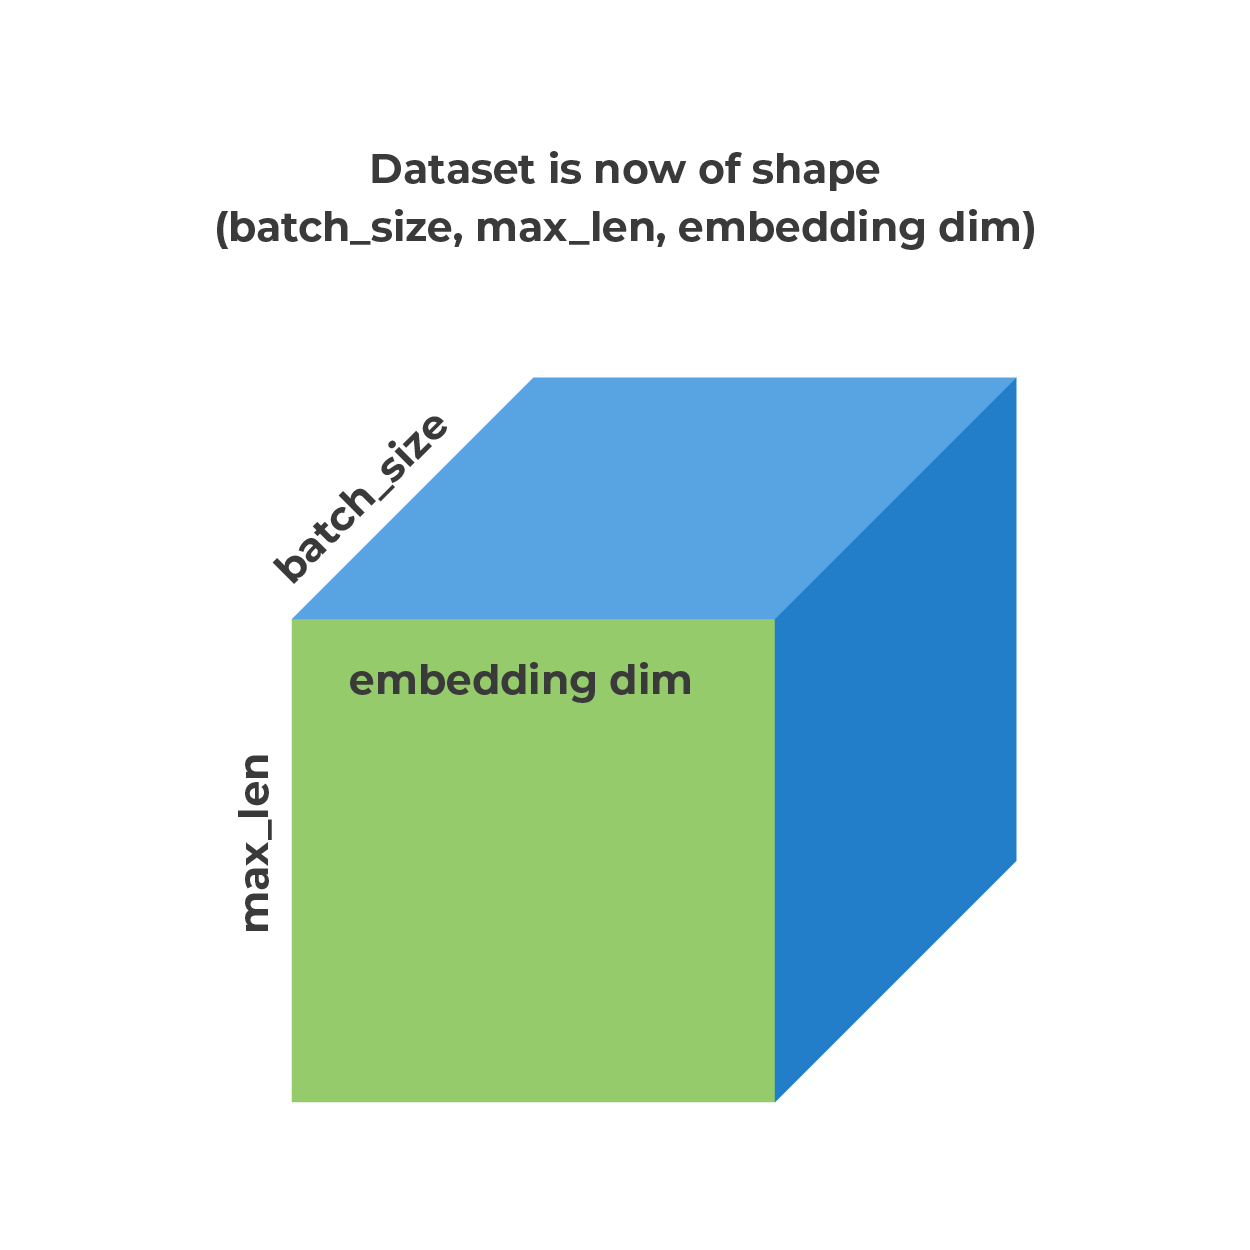</p>
<figcaption> Figure 10: An input embedding for a batch of data represented as three dimensional space. </figcation>
</center>
</figure>


The embedding in decoder is same as that in encoder.


ii. *Positional Encoding*

In RNNs, each word is being embedded not only by its meaning but also by its position (which is implicit) as the operation is sequential in nature. However, in the transformer, we are feeding data in parallel, so there is no positional information in encoding. So we explicitly add the positional information. The positional encoding can be fixed or learned.

To perform positional embedding the author has used sine and cosine wave. They had also tried learned embedding but both had produced an identical result. They went with sinusoidal encoding because of its simplicity and it can be used for sequence larger than those appeared in training sets.

The embedding layer is a combination of word embedding and positional embedding. Positional embedding is used to keep track of the position of the words. In a transformer network, the embedding size is 512. The size of positional embedding is also 512.


The positinal embedding, $\text{PE}$ is given as:

$$
\text{PE(pos, i)} = \left\{\begin{matrix} \text{sin}\Bigg(\frac{\text{pos}}{10000^{\text{i}/\text{dmodel}}}\Bigg) & ,if \hspace{1mm} i \hspace{1mm} is \hspace{1mm} even \\ \text{cos}\Bigg(\frac{\text{pos}}{10000^{\text{(i-1)}/\text{dmodel}}}\Bigg) & ,if \hspace{1mm} i \hspace{1mm} is \hspace{1mm} odd \end{matrix}\right.
$$

where, $ \text{pos}$ is the position of the word and $\text{pos} \in [\scriptsize{\text{0, MAX_SEQUENCE_LENGTH}}]$, $\text{i} \in [0,255]$ and $\text{dmodel} = 512$.



<figure>
<center>


<p>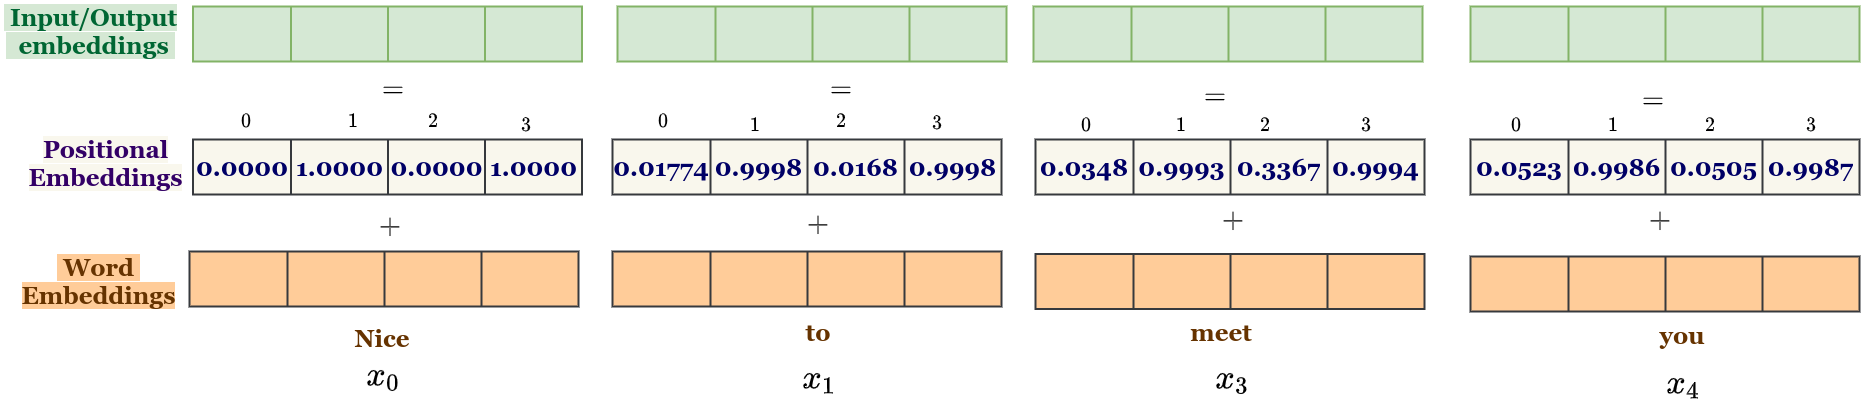</p>
 <figcaption> Figure 11: Input/Output Embeddings </figcation>
</center>
</figure>


It should be noted that the four boxes represent first four elements of a 512 dimensional vectors. Thus the values in the boxes in positional embedding represent the first four elements of a 512 dimensional vector. The addition of word embedding and positional embedding is element wise addition.

<!-- Source: https://medium.com/dissecting-bert/dissecting-bert-part-1-d3c3d495cdb3 -->


Finally, we add positional embedding with the word embedding. Since, the meaning information is more important than the position information, we give more weight to the word embedding than to the positional embedding, as represented by the color-coding in the figure 13 below:

<figure>
<center>


<p>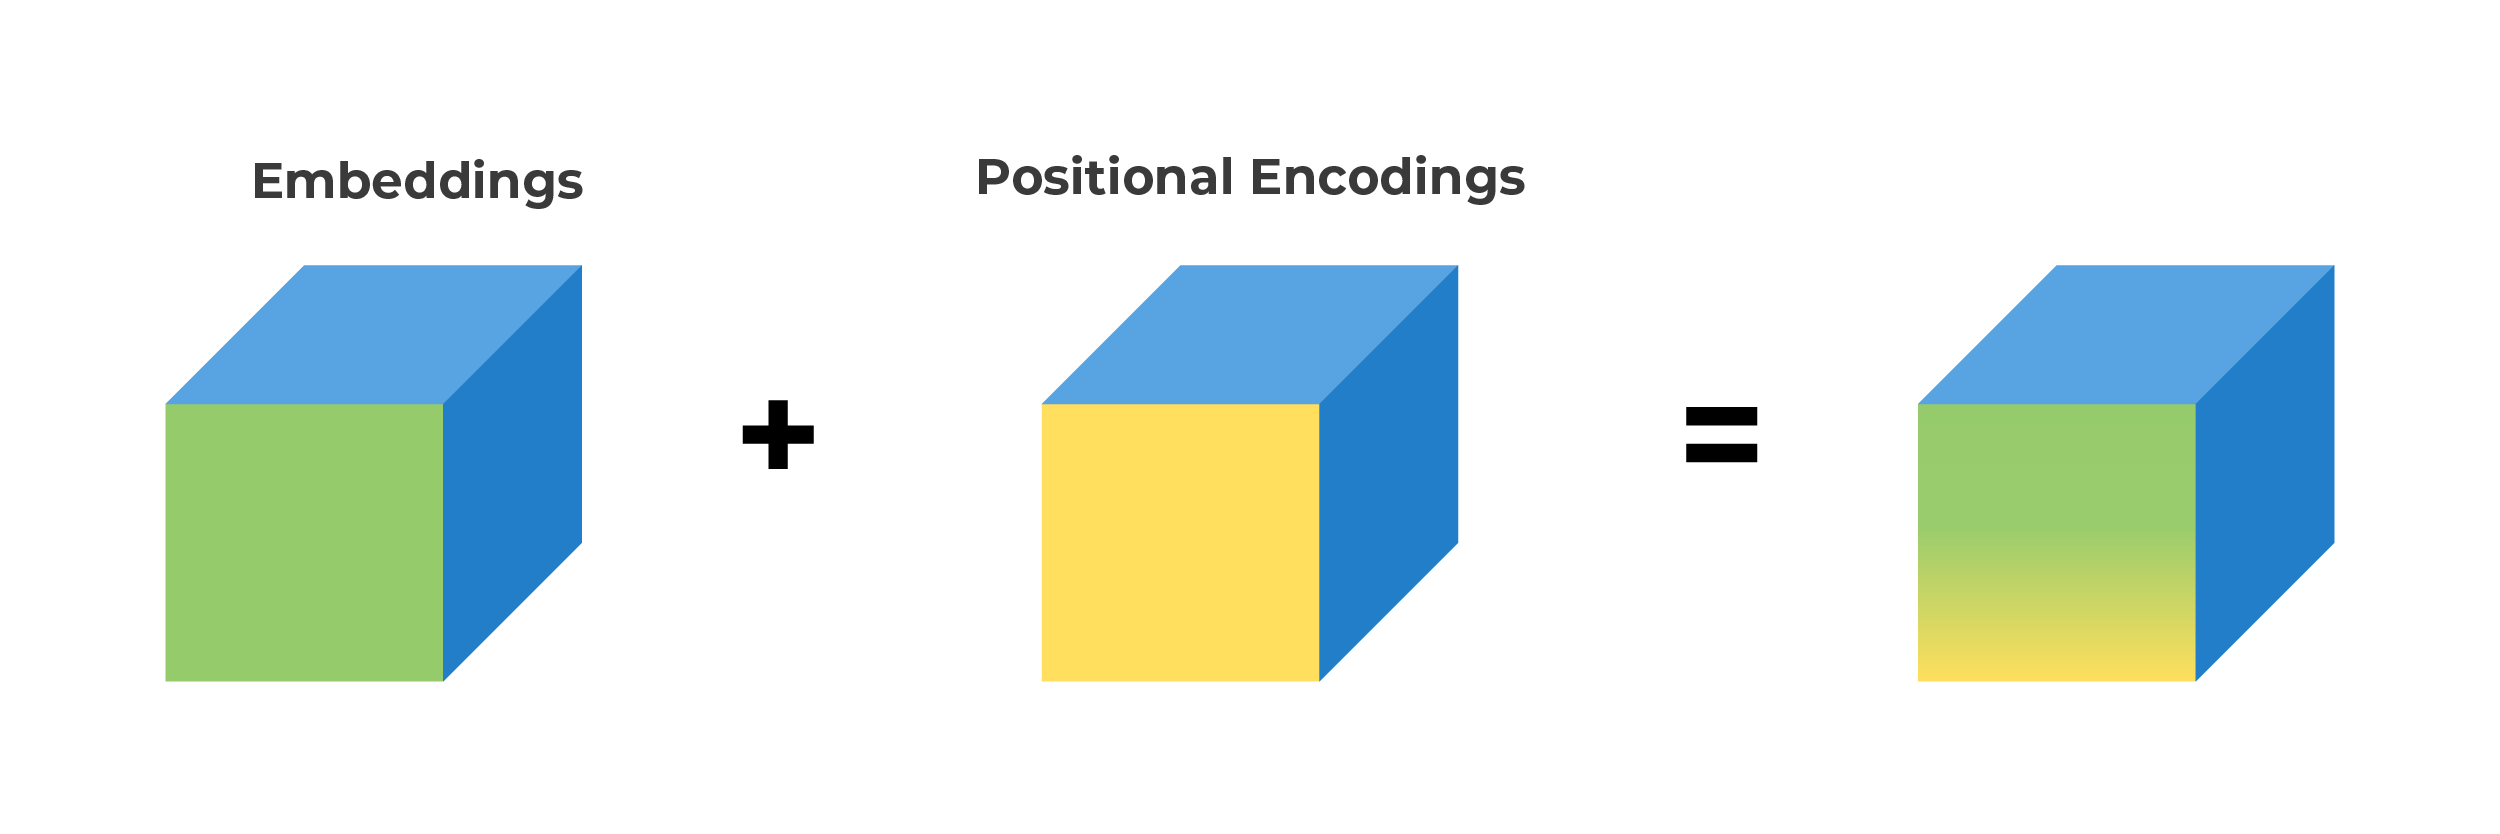</p>
<figcaption> Figure 12: Image showing the summation of input embedding and positional embedding. Since the input embedding is given a higher weight,this effect is shown by color in the resultant.<figcaption>
</center>
</figure>


Similarly, the decoder has similar positional encoding as that in the encoder.


iii. *Multi-headed attention*

Multi-head attention is the key component of the transformer because of which transformer is too much powerful. Instead of just one linear transformation as in single head attention, we perform multiple linear transformations.

In multi-head attention we perform the following operations:

 > a. Multiple linear transformations.

 > b. Dot product operation to compute attention weight.

 > c. Attention vector calculation.

 > d. Concatenation and linear transformation.
 
<figure>
<center>


<p>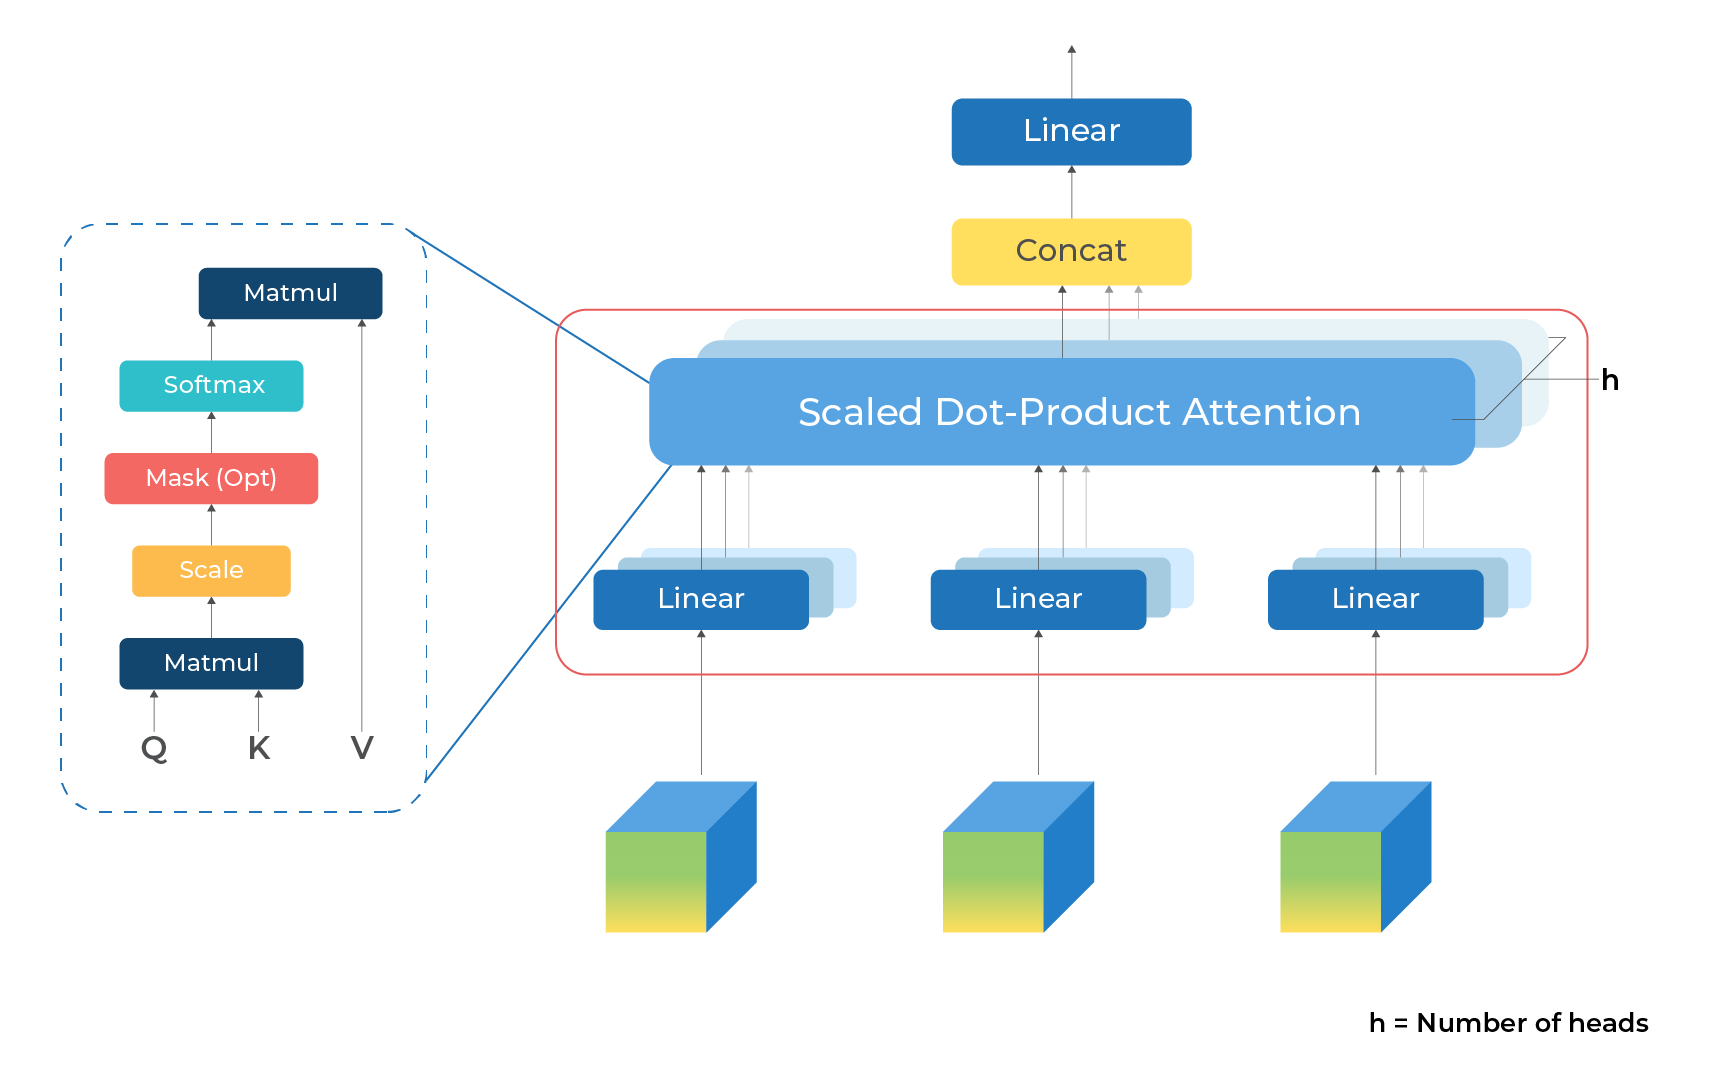</p>
<figcaption> Figure 13: Block diagram of multihead attention.
</figcaption>
</center>
</figure>


For each head i:
$$head_i = Attention(QW_i^Q,KW_i^K,VW_i^V)$$

After that, we concatenate them back and run them through a linear layer so that these parameters can interact with each other.

$$MultiHead(Q,K,V)=Concat(head_1,....,head_h)W^O$$

While generating multiple sets of query, key, and value, we can perform either 8 different sets(Q, K, V) of projections or perform one linear projection into the vector of dimension equal to the size of embedding dimension and then divide embedding dimension into h different heads.
Here we will generate query, key, and value of dimension equal to the input dimension and divide each of the query, key, and value into h different heads along embedding dimensions.

<figure>
<center>


<p>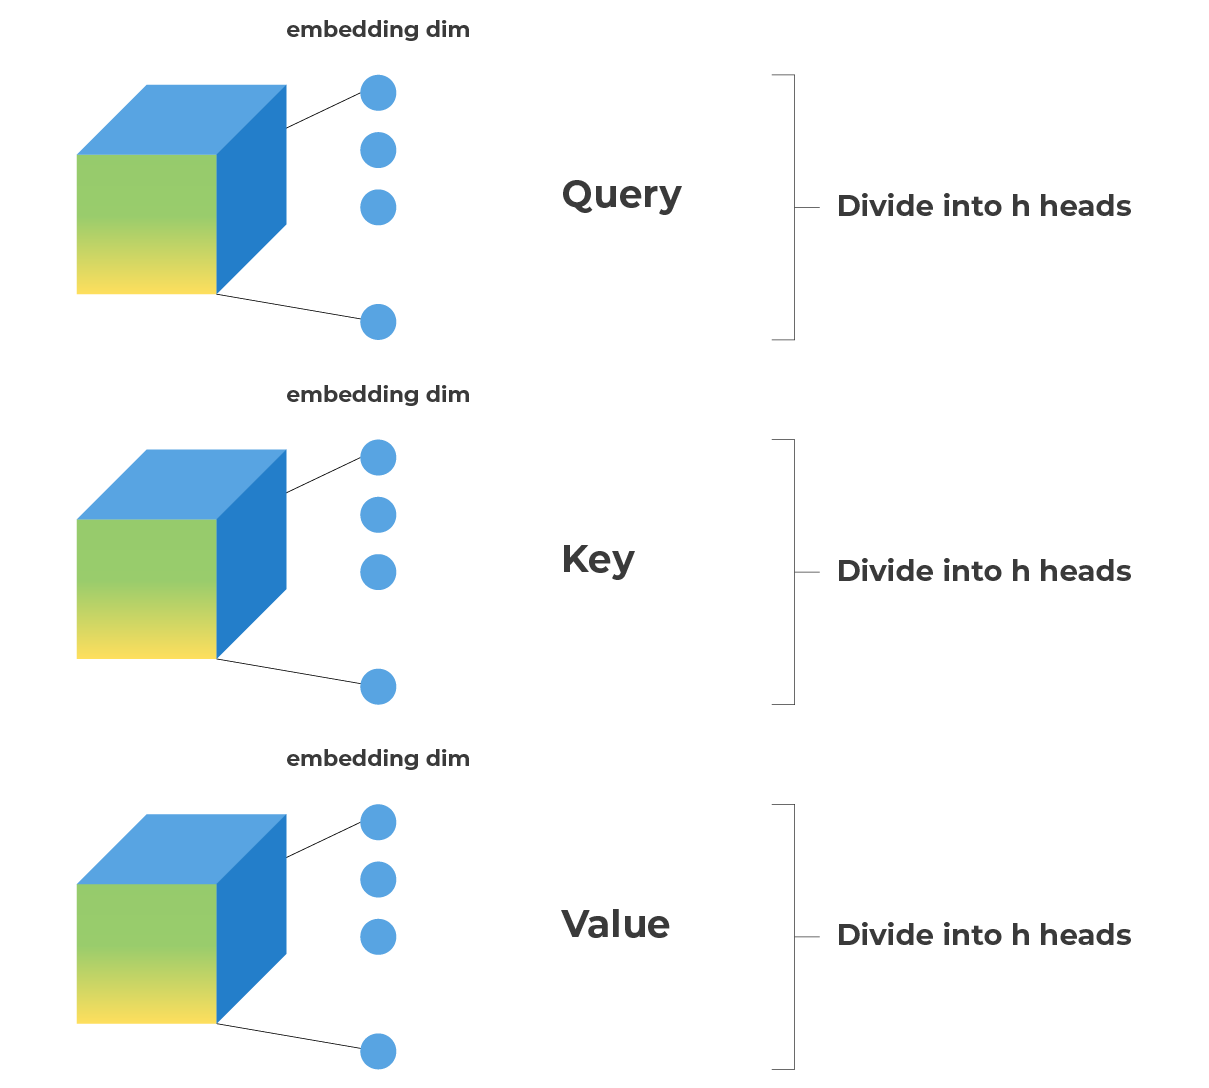</p>
<figcaption> Figure 14: Splitting each of the query, key and value into h heads for multi-head attention. <figcaption>
</center>
</figure>

The dimensionlity of each head $d_k$ is $\frac{Embedding \space dimension}{h}$

So if we use 8 heads, then each head would have a dimension of 512/8 = 64

After generating h different sets of query, key, and value, we then perform self-attention mechanisms in each set separately and then concatenate them and then finally pass them though the linear layer so that these attentions can interact with each other.

<figure>
<center>


<p>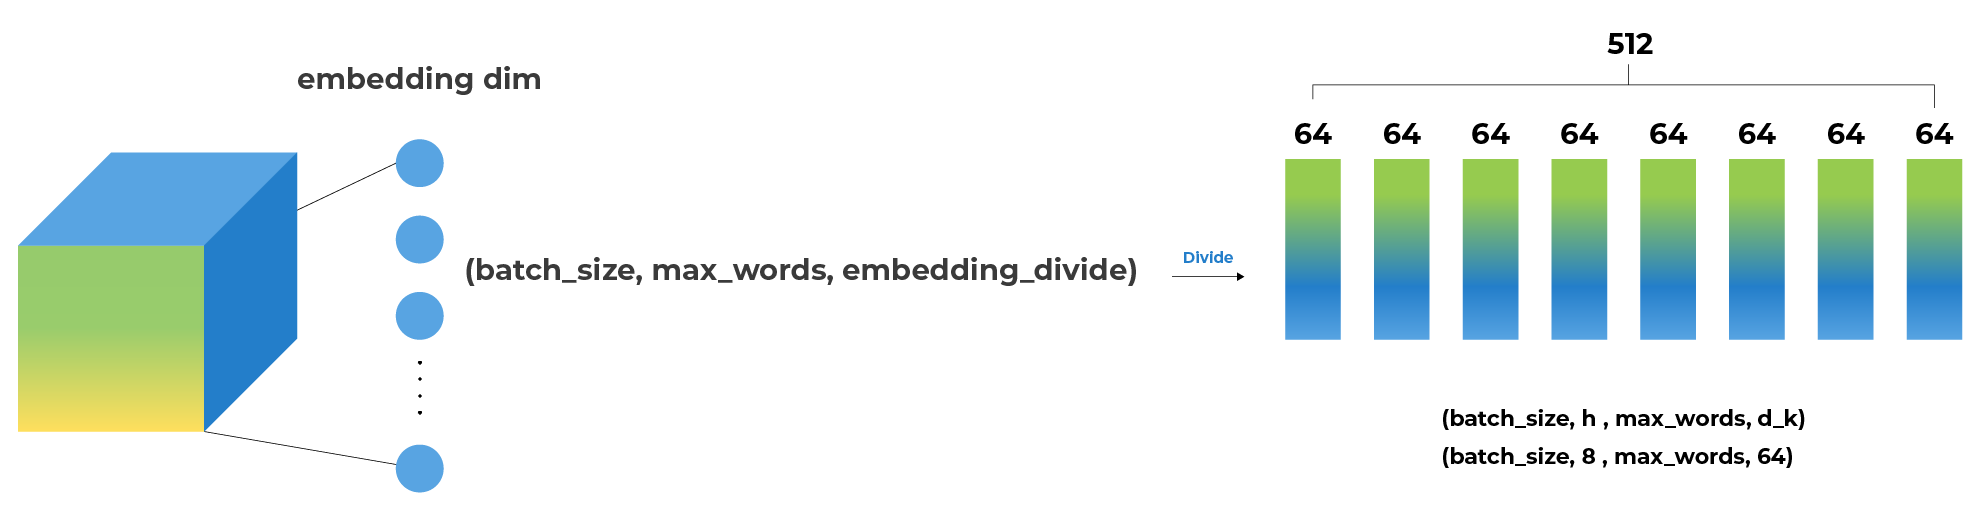</p>
<figcaption> Figure 15: Image showing division of a vector into 8 heads of size 64 each.<figcaption>
</center>
</figure>


We can visualize how we divide the embedding dimension to generate multiple heads to perform attention in them separately. Also, note how the dimension has changed. This is done for each query, key, and value. 

Now we perform dot products between query and key to obtain attention weights.

<figure>
<center>


<p>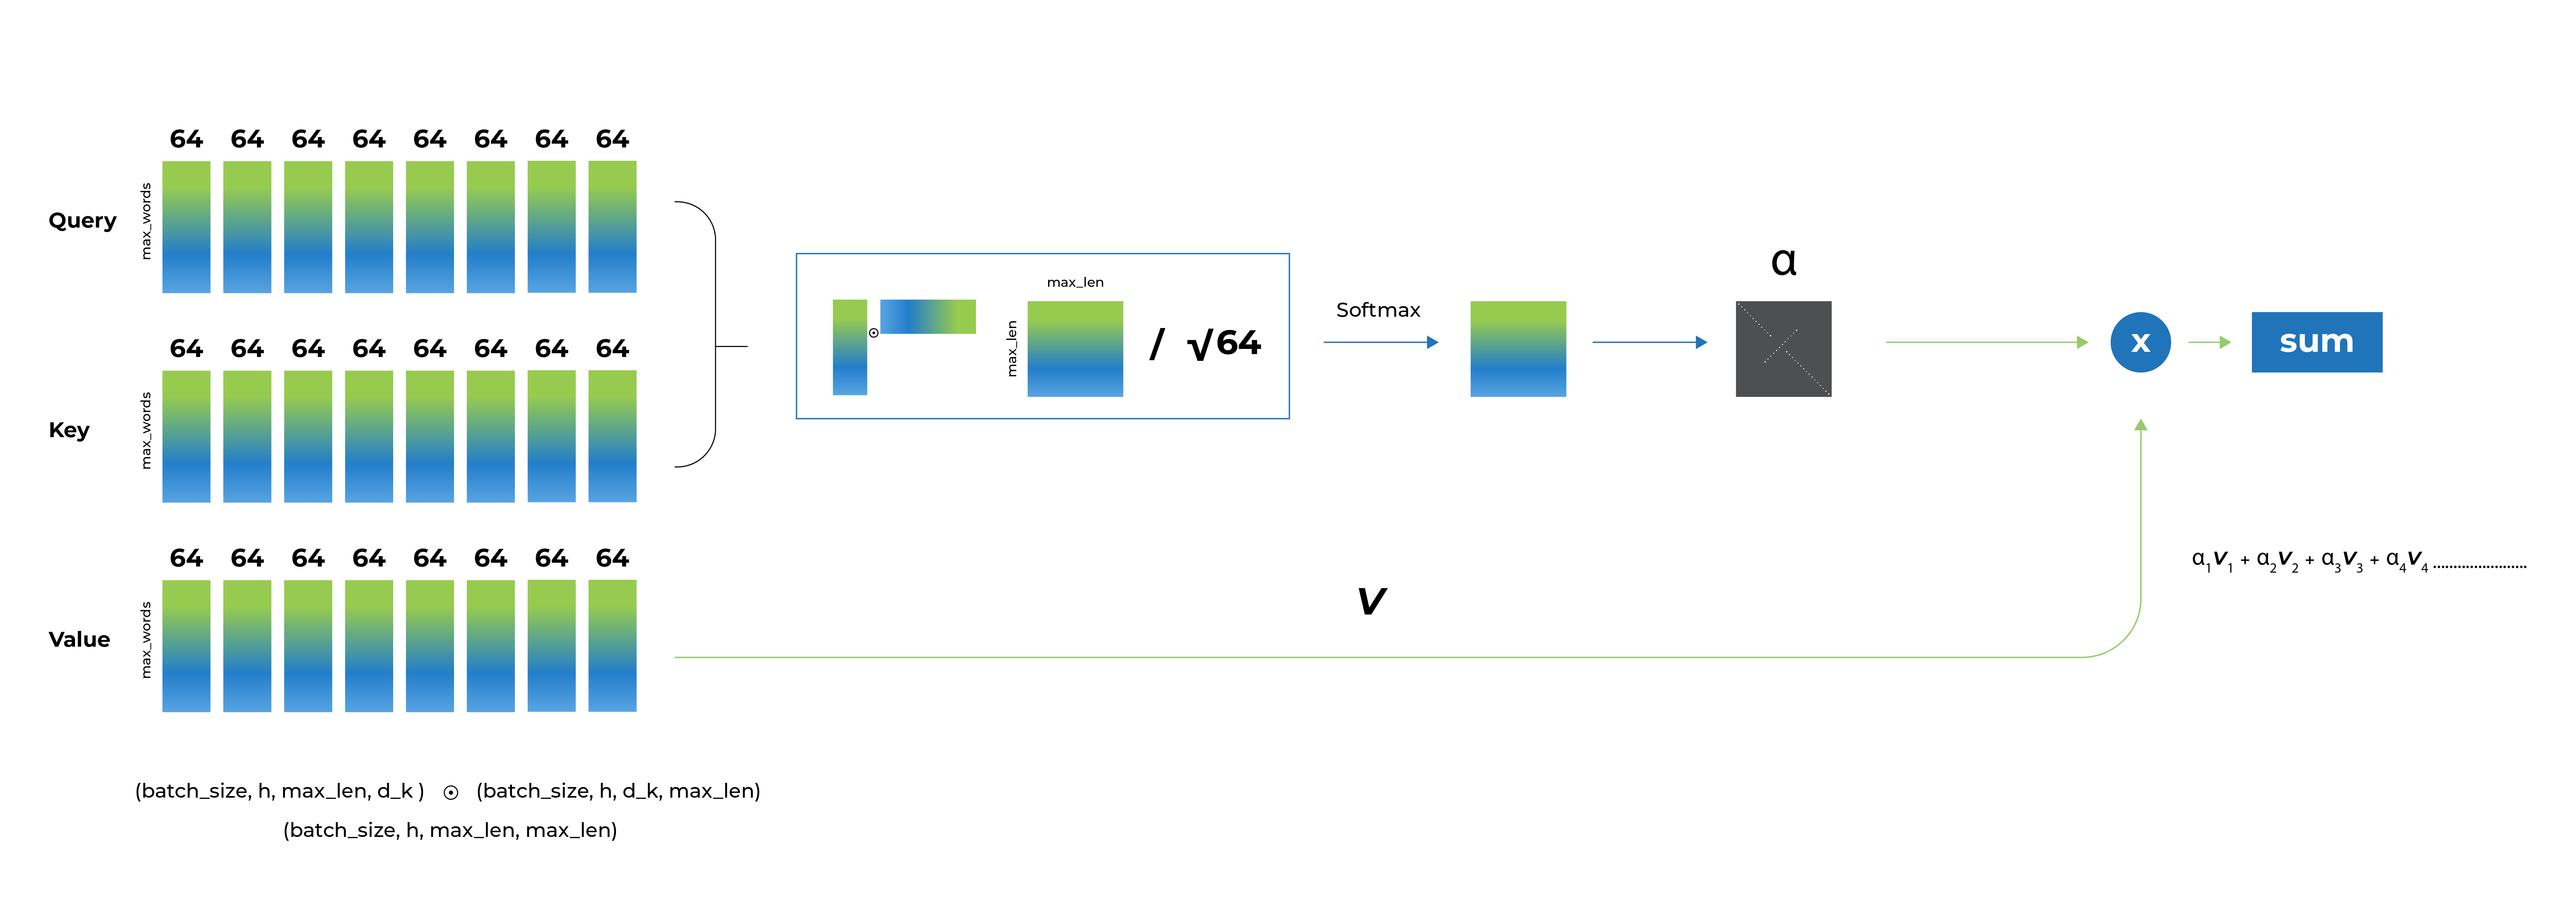</p>
<figcaption> Figure 16: Image showing each of the steps in multi-head attention.<figcaption>
</center>
</figure>

Since the shape of each attention vectors is 64. We concatenate the attention matrix of each Q, K and V to obtain a matrix of size 512. We are concatenating so that the shape of embedding coming out from a multi-head attention block is same as that of embedding entering into a multi-head attention block. The difference is that the output of multi-head attention has stronger representation than that of input embedding. Also, we are making sure that the embedding vector size at the output of different components of the transformer is same as that of input embedding(i.e, 512). Doing so will make the stacking of encoder or decoder possible. We will discuss about stacking in the later section. Finally, we run them through a linear layer so that these concatenated attention head can interact with others for the better encoding of input information.


The second approach for performing multi-head attention is to separately project the data to 8 different sets of Q, K and V. The following figure  shows each of the steps for multi-head attention.

<figure>
<center>


<p>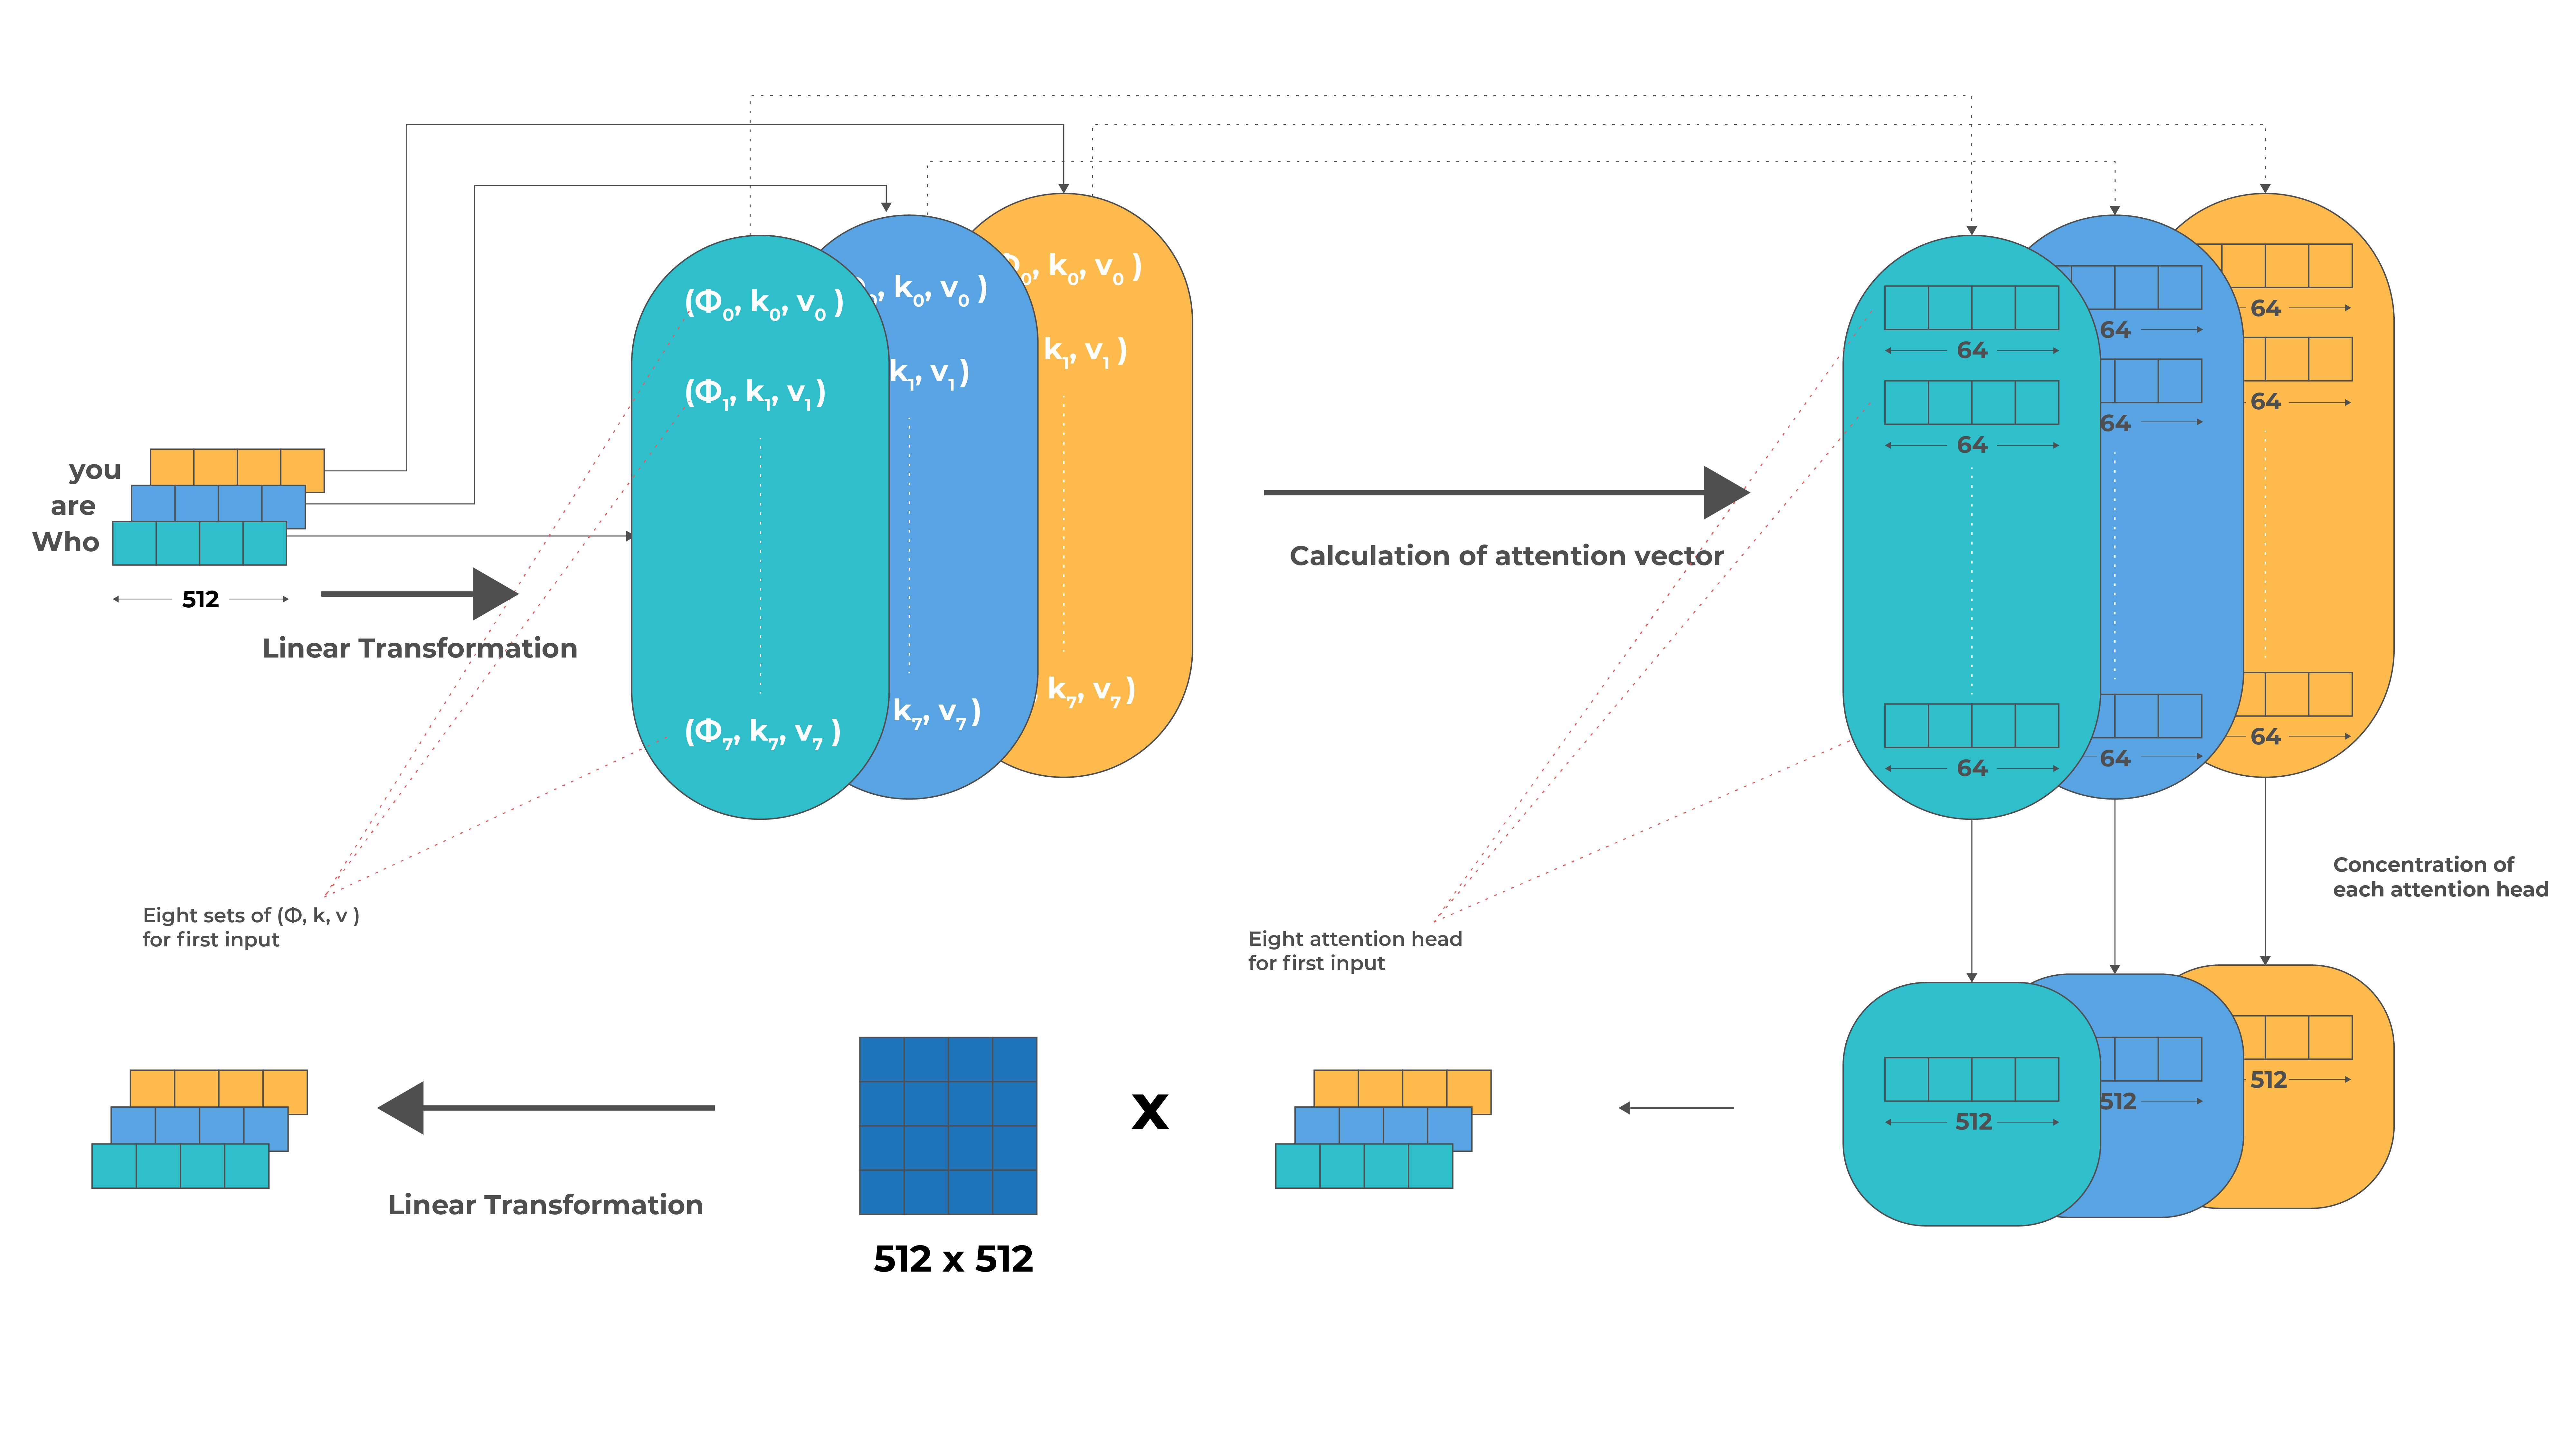</p>
<figcaption> Figure 17: Multi head attention by making transformation of input embedding into 8 sets of query, key and value directly. <figcaption>
</center>
</figure>

Multi-head attention used at decoder side is similar to that used at encoder side. 


iv. *Residual connections, normalization and regularization*

To enhance the peformance of transformer, the author has used residual connections which enhances the information flow through the network. Moreover, layer normalization is used to solve covariance shift issue and hence to enhance faster convergence of network. To avoid overfitting dropout is applied to the output of each sub-layer and to the sum of word embeddings and positional embeddings in both of the encoder and decoder. The paper has also used label smoothing to avoid overfitting(overconfidence).


v. *Feed Forward*

The output of attention result is a vector with an embedding dimension of 512. This output is passed through two linear(feed-forward) layers to learn more encoding information. The dimension of encoding as discusses in the paper are $512\rightarrow 2048$ for the first layer and $2048\rightarrow 512$ for the second layer. The feed-forward network used is called a position-wise feed-forward network because each of the words in a sentence is feed-forwarded separately and identically through a separate network.

So there is two linear transformation with relu non-linear transformation in between.
$$FFN(x)=max(0,xW_1+b_1)W_2+b_2$$


Just after the feed-forward component in the transformer, we are also applying a residual connection. The thing that is actually happening in the `add and norm` block after `feed-forward` block is illustrated in the figure below:

<figure>
<center>


<p>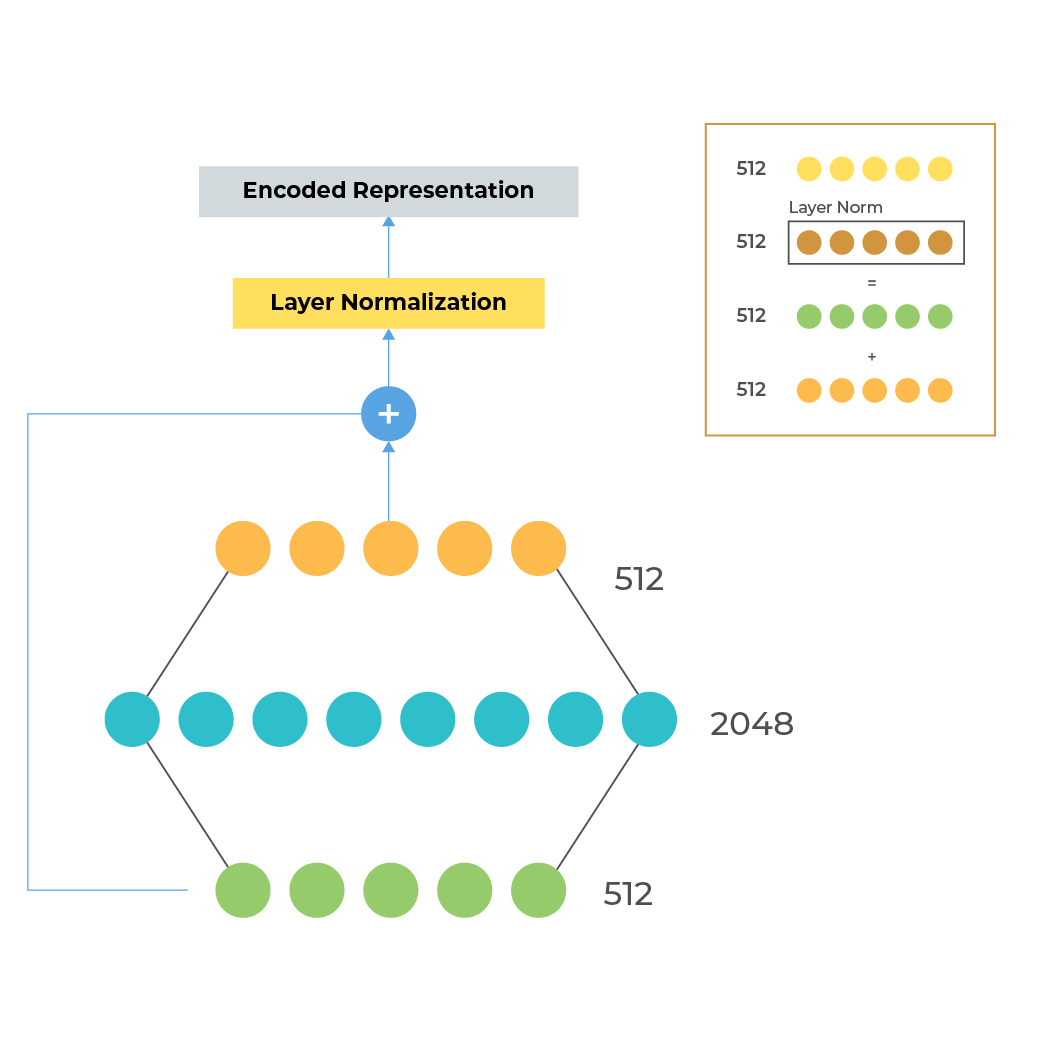</p>
<figcaption> Figure 18: Feed forward layer, layer noralization and residual connection in transformer. <figcaption>
</center>
</figure>


Similarly, the decoder also has the same feed-forward and residual connection as that of the encoder.


Have you ever noticed term $N_x$ in the left and right side of the encoder and decoder representation of the transformer block diagram? $N_x$ in the encoder represents that the encoder is repeated N times. The actual paper implementation uses the repetition of 6 for each encoder and decoder forming 6 layers in each of the encoder and decoder parts. So what actually is happening is that the output of the first layer is passed as input to the second layer; the output of the second layer is fed to the third layer and so on.
The encoder has two sublayers: multi-head attention layer and fully connected feed-forward layer. Apart from fully connected feed-forward layer, we have residual connection followed by layer normalization. Note that since we are performing skip connection the output embedding dimension is kept fixed at $d_{model}$=512.

Similarly, the decoder has three sublayers: multi-head attention layer, masked multi-head attention layer, and fully connected feed-forward layer. We will discuss about the masked multi-head attention in the next section.


vii. Masked multihead attention

Masked multi-head attention is used at the decoder side of the transformer just after the embedding/encoding component. Masked multi-head attention is very similar to the multi-head attention with few minor differences. With a sequential model like RNNs, the decoder receives one word at each time step so the decoder would be unfamiliar with the next word during both training and testing. However in the transformer, the decoder process all the words in a sentence simultaneously. This mechanism allows the decoder to compute attention result by looking at the future words which are not predicted/generated yet. So decoder must be trained in such a way that it doesn't know the future word and hence it couldn't cheat and don't learn to look at future words because at test time we don't have the future words. This is not an issue with the sequential model as they process one word at each time step. Therefore, the decoder is allowed to attend the earlier positions; not the future positions. So we simulate the same scenario of testing time for the training time. We can do this by applying a special masking called a subsequent mask.

For example, if we have a 5 word sentence: 

**I love being a vegeterian**

Then we will perform masking as:

$$[[[1,\space 0, \space 0, \space 0,\space 0],\quad word1 \\ \space \space[1,\space 1, \space 0, \space 0,\space 0],\quad word2 \\ \space \space[1,\space 1, \space 1, \space 0,\space 0],\quad word3 \\ \space \space[1,\space 1, \space 1, \space 1,\space 0],\quad word4 \\ \space \space[1,\space 1, \space 1, \space 1,\space 1]]] \quad word5$$

The above matrix shows that for the first time we are allowing the decoder to access the first word in the sentence. In the second step, we are allowing the decoder to access both first and second words and so on.




*Let's visualize how subsequent masking takes place in decoder*


In [ ]:
from IPython.display import HTML

HTML("""
    <video width="500" alt="test" controls>
        <source src="https://docs.google.com/uc?export=download&id=1fYol_Wx2sBxKKd4VAgRbIroNi6oa1WI-" type="video/mp4">
    </video>
""")

Moreover,during training we wrap up sentence with start and end token.
i.e, For sentence, I love being a vegeterian

$
\begin{matrix}
\color {blue}{Input:} & <start> & I & love & being& a & vegeterian\\
\color{blue}{Label:} & I & love & begin & a & vegeterian & <end>
\end{matrix}
$

And the label above should be masked as discussed above. The input to the decoder will be:

<figure>
<center>


<p>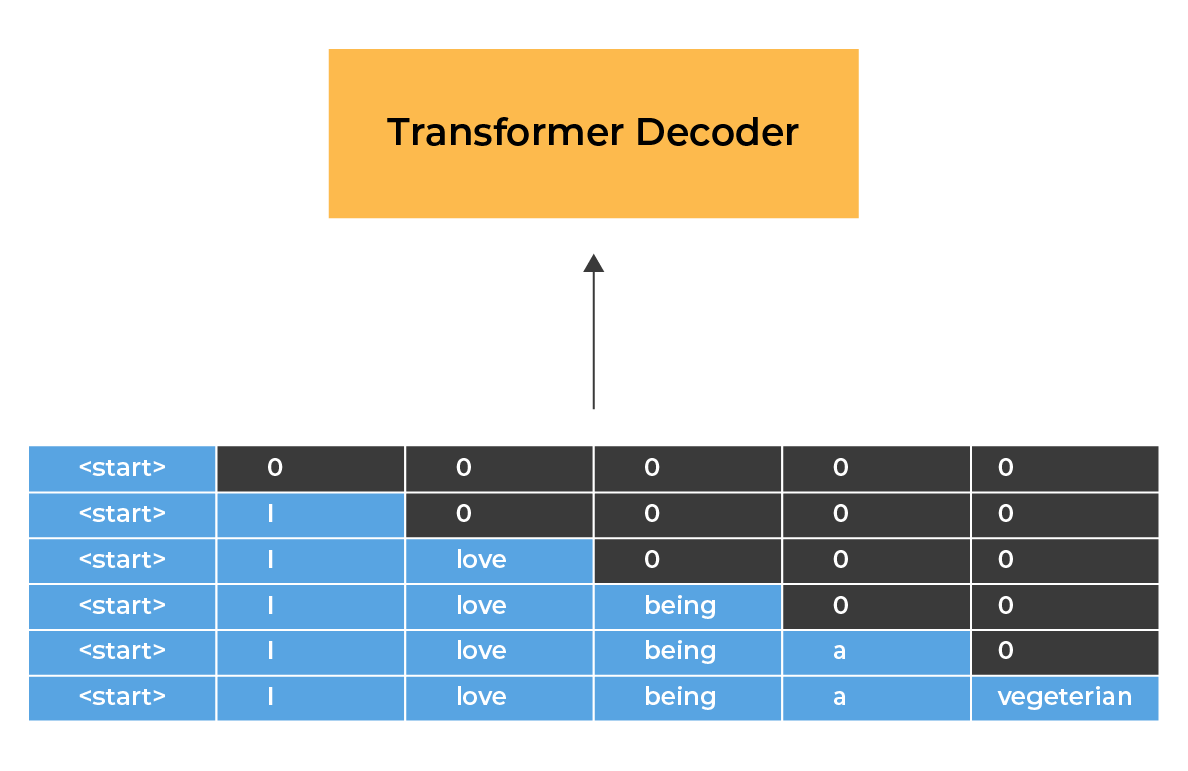</p>
<figcaption>Figure 19: Masking the input at the decoder side to prevent access of future words by words at initial positions. <figcaption>
</center>
</figure>





**Multi-head attention at decoder**

Almost all the components at the encoder and decoder side have same architecture. Multi-head attention at the decoder side works same as that at the encoder side, except that multi-head attention at decoder receives key and value from the encoder side and query from masked multi-head attention block at the decoder.


**Final linear layer and softmax layer**
The final stack of the decoder has a floating vector of shape 512. This is linearly transformed into a vector of dimension equal to the size of the unique words(i.e unique vocabulary list). This is followed by the softmax layer which gives the probability of each of the words of vocabulary. The predicted word will correspond with the index having the highest probability value.


**Additional material**

*Self-attention comparison with RNNs*

* Computational complexity per layer: Self-attention layers are faster than recurrent layer if the sequence length n is smaller than the representation dimensionality d. To improve the computational performance of tasks involving a very long sequence, self-attention could be restricted to consider only a neighborhood of size 'r' in the input sequence centered around the respective output position.

* The amount of computation that can be parallelized in the transformer is higher in the transformer. RNNs are sequential.

* Transformer is better at learning long term dependency in the sequence as self-attention connects all positions in the sequence.


## Takeaways
The major takeaways of this lesson are:

* Transformers are the sequence to sequence model without any recurrent components. They rely completely upon attention to compute the hidden representations.

* Transformers use multiheaded self-attention mechanisms to compute attentions scores.

* Positional Encoding is used to represent the position values and to keep track of the position of the words.

* Multi-head attention is the key component of the transformer because of which transformer as we perform multiple linear transformations.

* Probabilities of some values are masked in masked attention. Probabilities of masked values are nullified to prevent them from being selected.


## Resources
* Papers

    * [Attention is all you need](https://arxiv.org/abs/1706.03762)
    * [Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/abs/1409.0473)

* Articles
   * [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
   * [Transformer Architecture: Attention Is All You Need](https://medium.com/@adityathiruvengadam/transformer-architecture-attention-is-all-you-need-aeccd9f50d09)    
   * [Transformer Architecture: The Positional Encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)
